In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('yield_df.csv')

In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape

(28242, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [14]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [17]:
import pandas as pd;
from sklearn.tree import DecisionTreeRegressor;
important_features = pd.Series(DecisionTreeRegressor().fit(x, y).feature_importances_, index=X.columns).sort_values(ascending=False);
print("Most important features for crop yield prediction:", important_features)


NameError: name 'x' is not defined

In [18]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


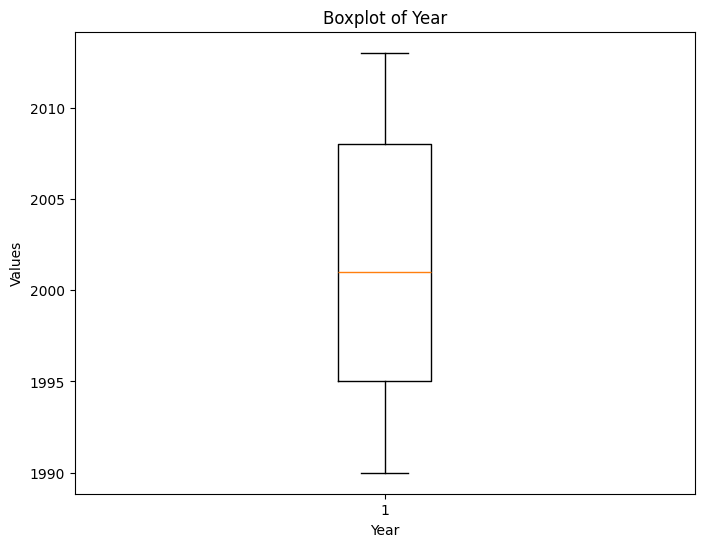

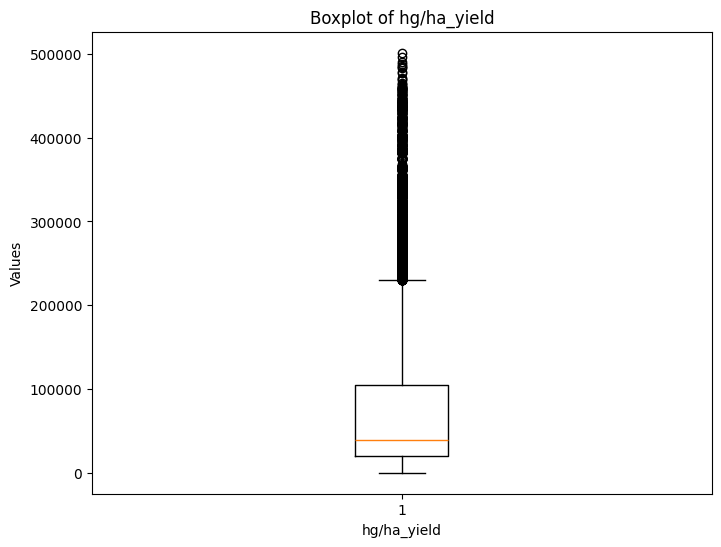

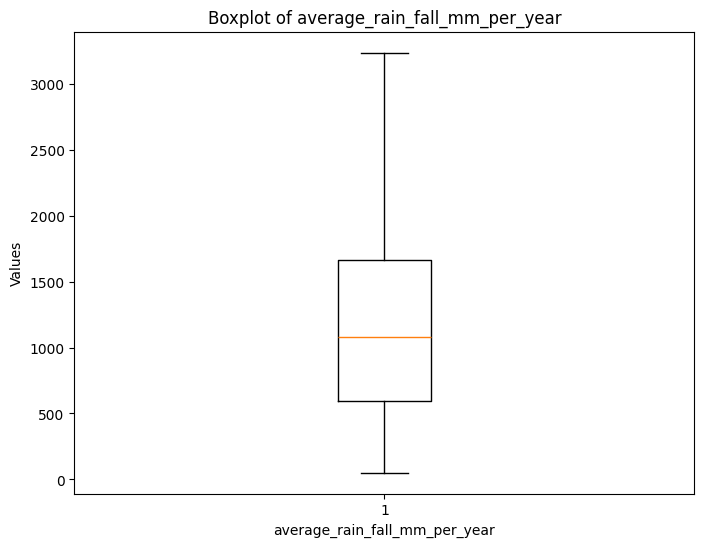

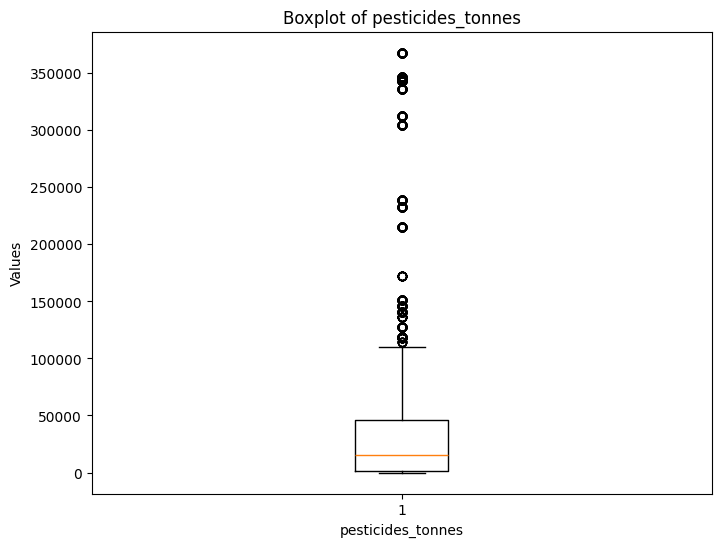

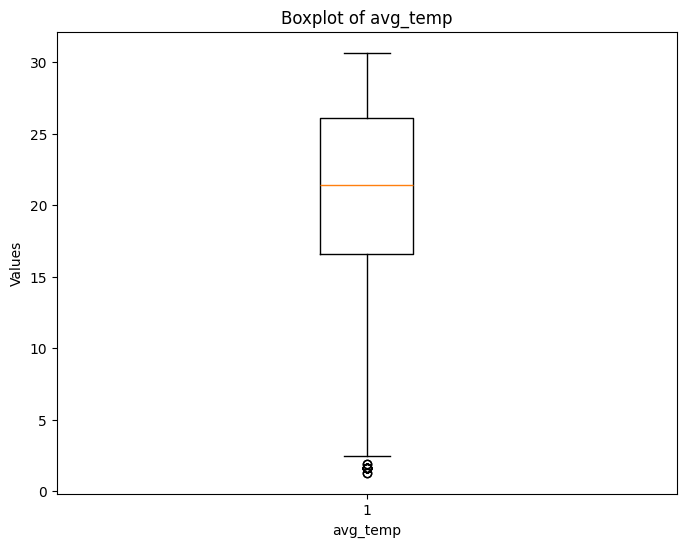

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

In [21]:
import pandas as pd
import numpy as np

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame if different

def remove_outliers_zscore(df, threshold=3):
    # Calculate Z-scores for each data point in the DataFrame
    z_scores = (df - df.mean()) / df.std()
    
    # Identify outliers by finding data points with Z-scores beyond the threshold
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    
    # Remove outliers from the DataFrame
    df_no_outliers = df[~outliers]
    
    return df_no_outliers

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number')

# Remove outliers from numeric columns
df_no_outliers = remove_outliers_zscore(numeric_columns)


In [22]:
df_no_outliers

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1990,36613,1485.0,121.00,16.37
1,1990,66667,1485.0,121.00,16.37
2,1990,23333,1485.0,121.00,16.37
3,1990,12500,1485.0,121.00,16.37
4,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...
28237,2013,22581,657.0,2550.07,19.76
28238,2013,3066,657.0,2550.07,19.76
28239,2013,13142,657.0,2550.07,19.76
28240,2013,22222,657.0,2550.07,19.76


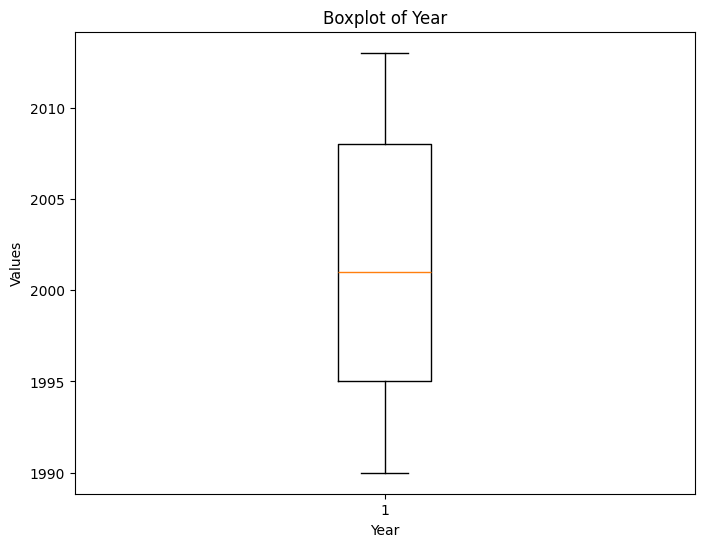

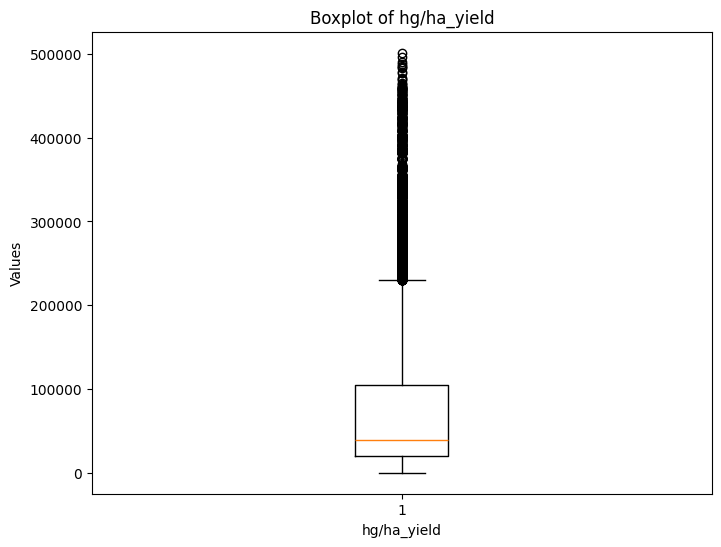

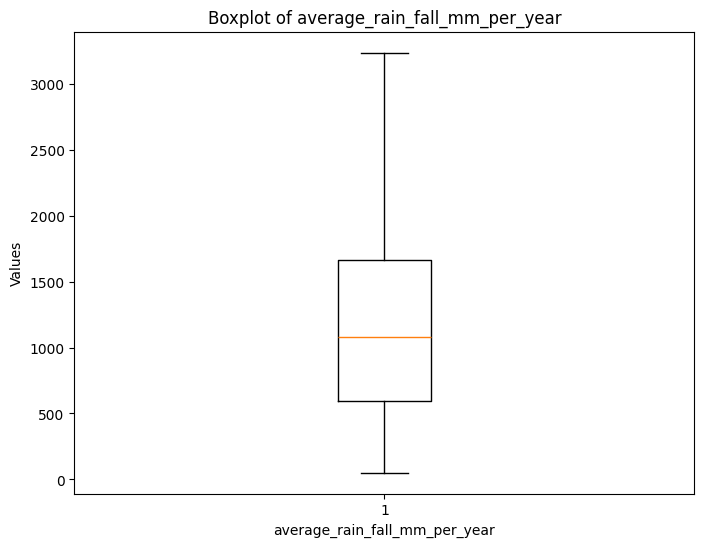

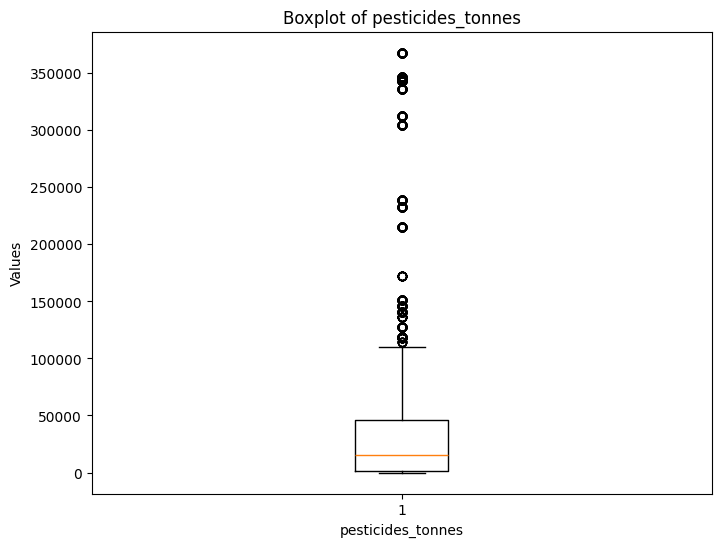

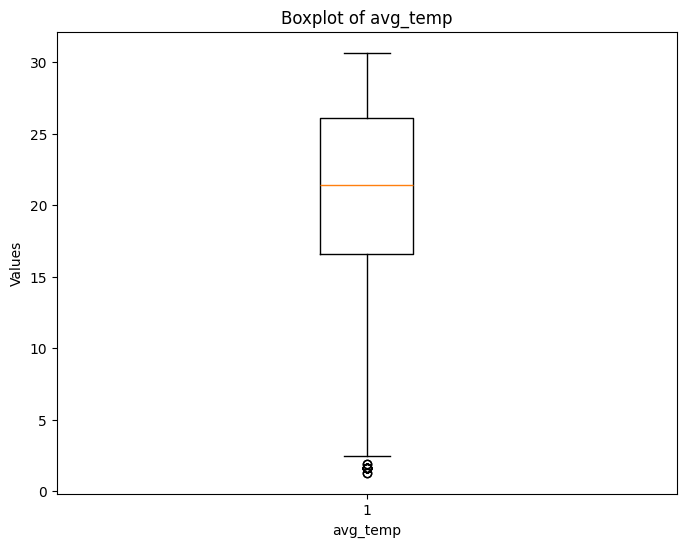

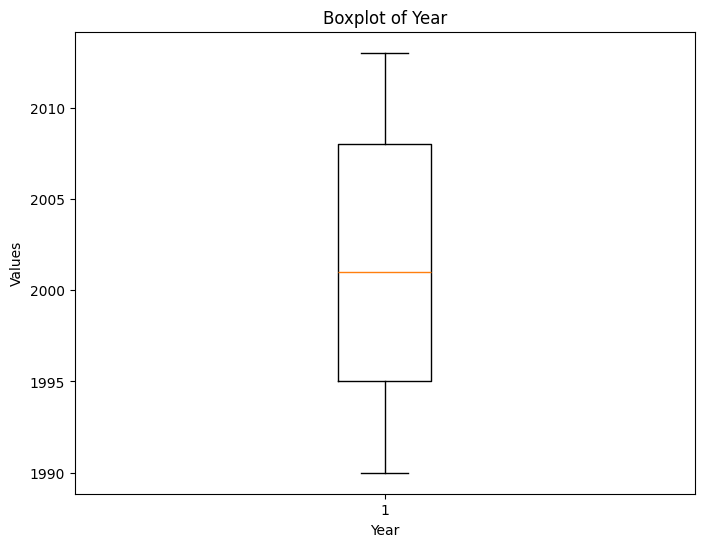

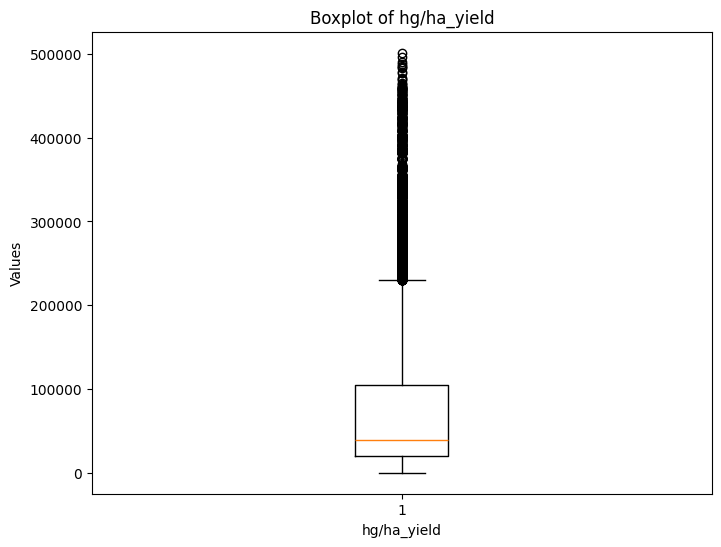

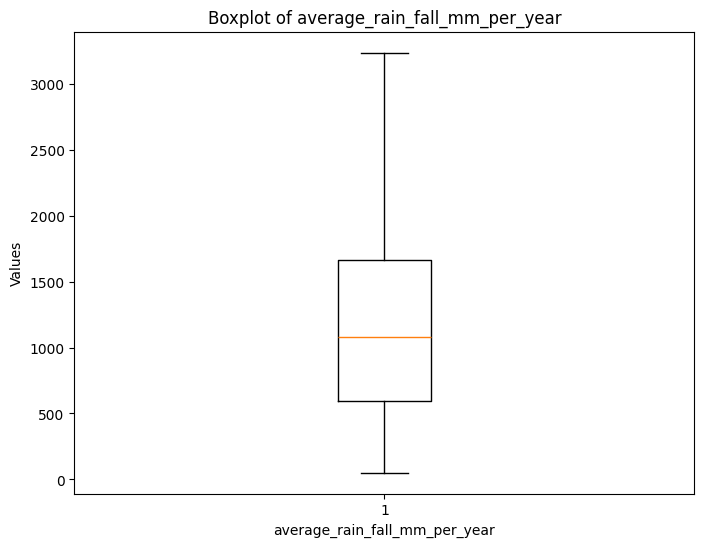

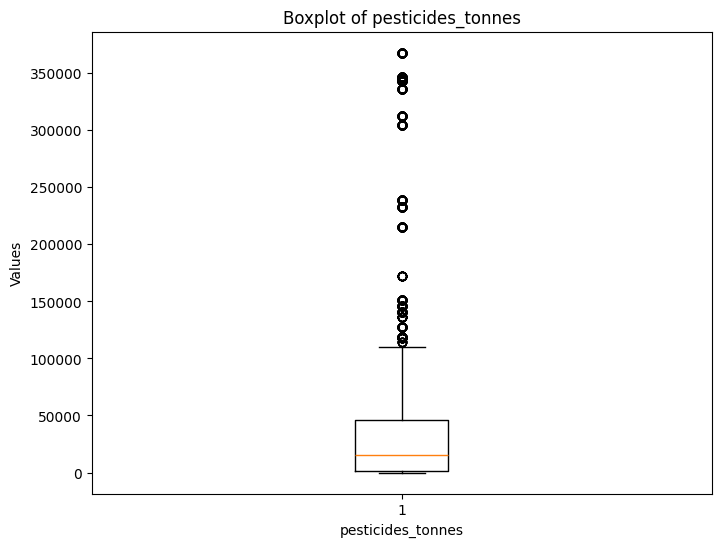

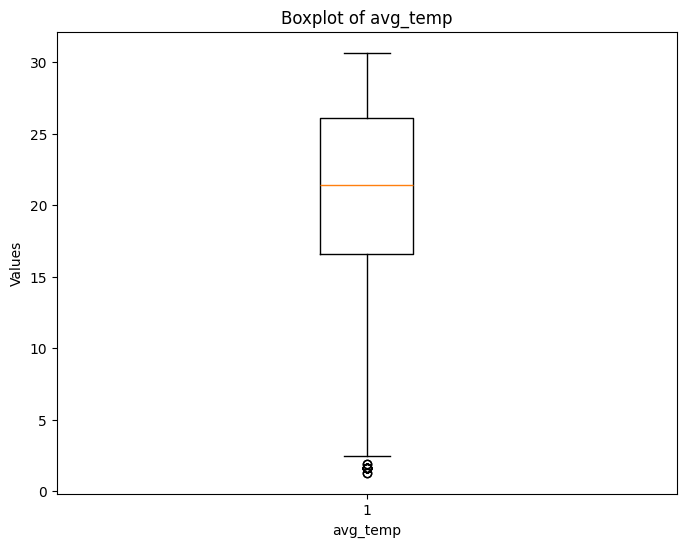

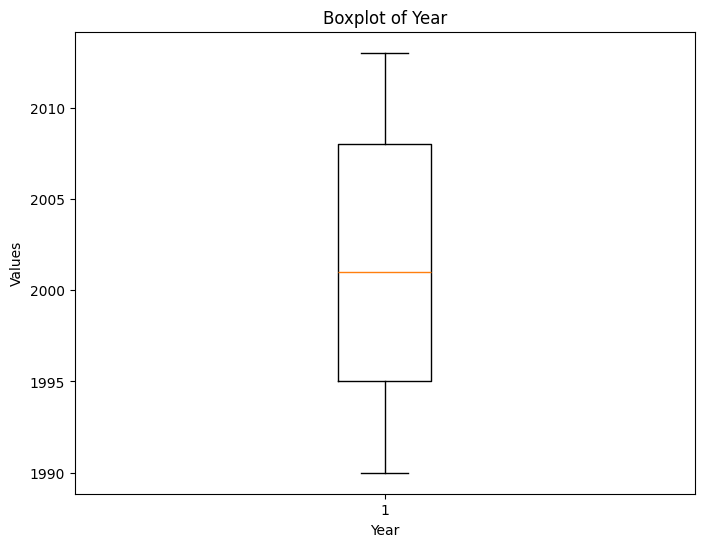

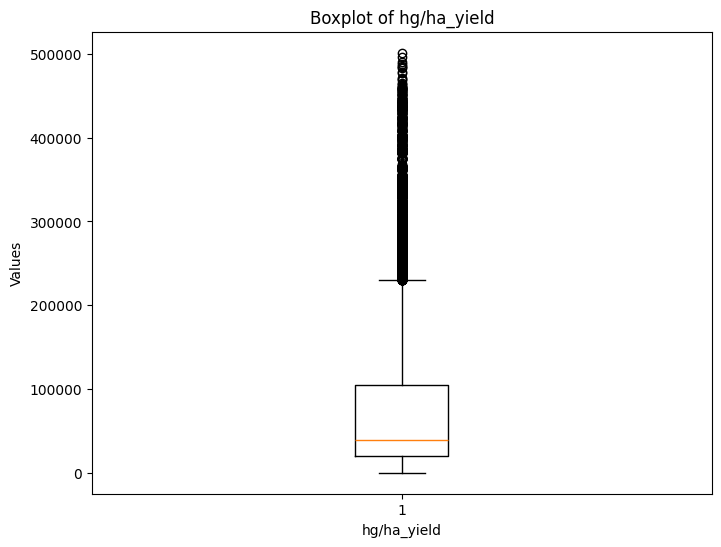

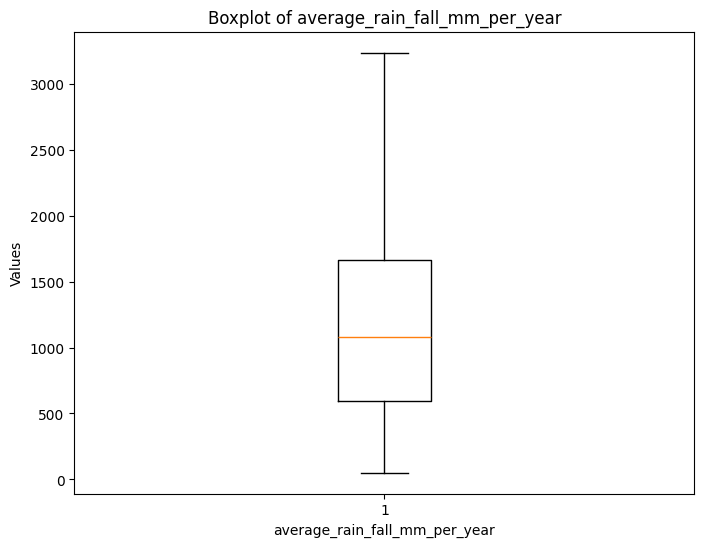

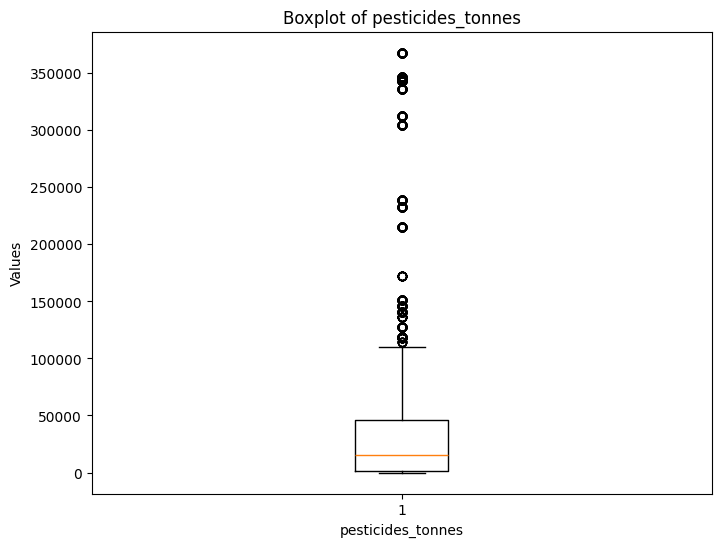

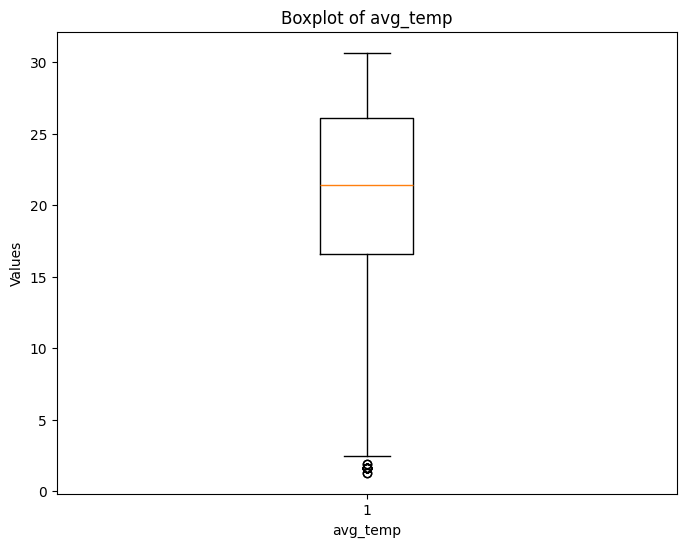

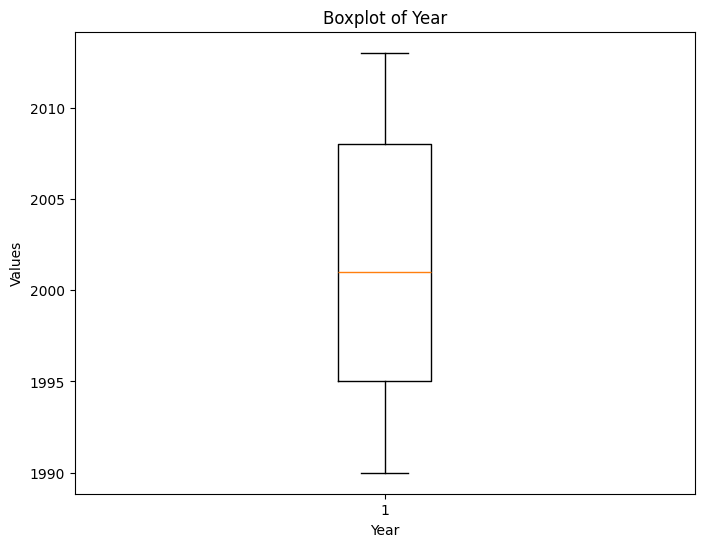

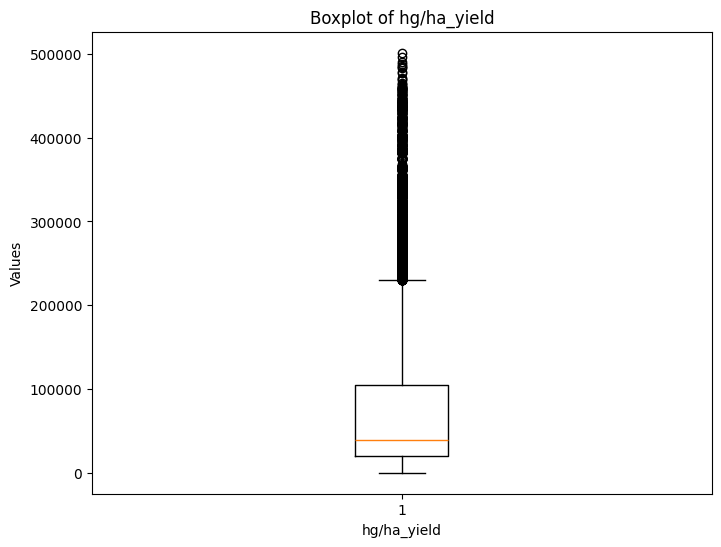

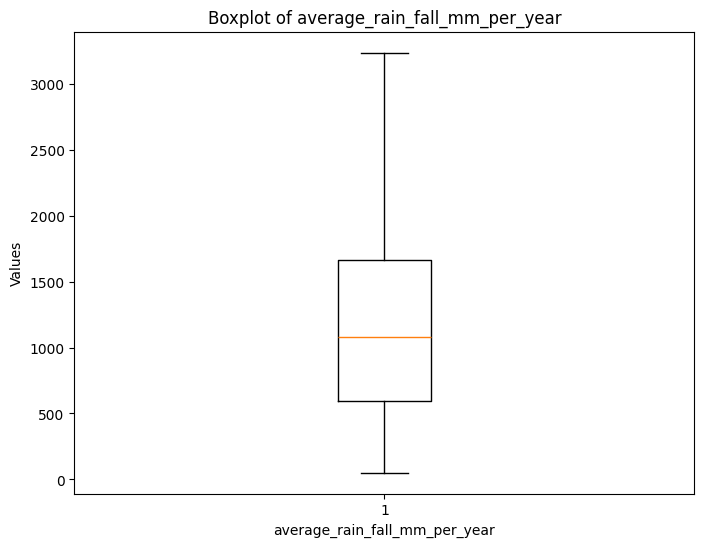

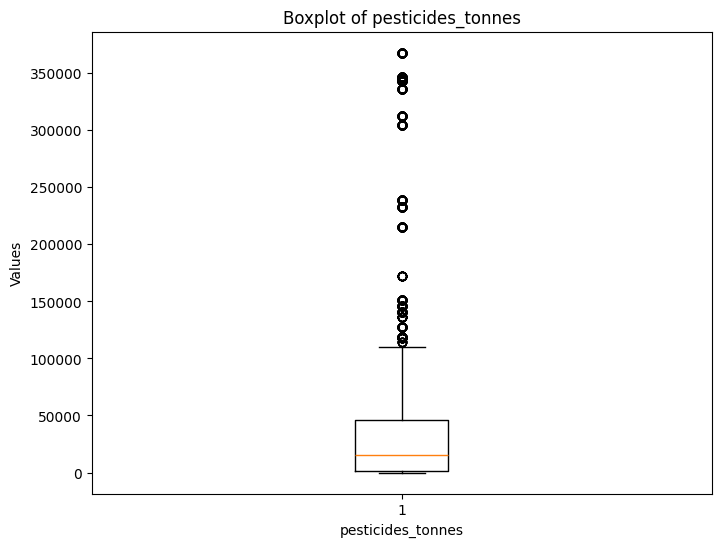

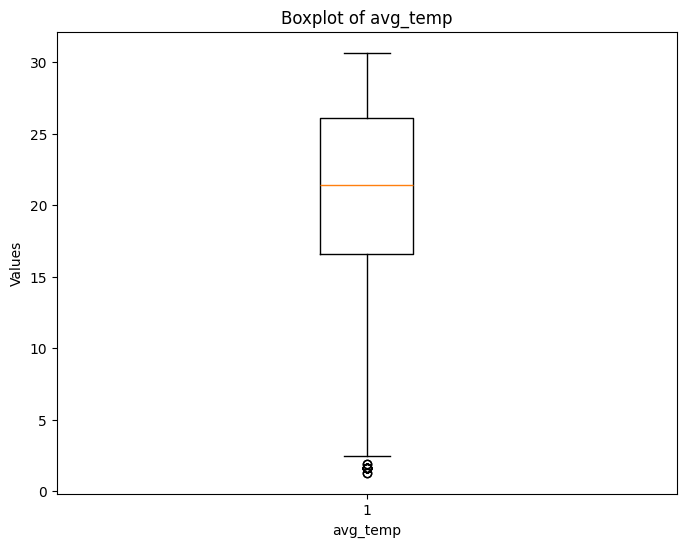

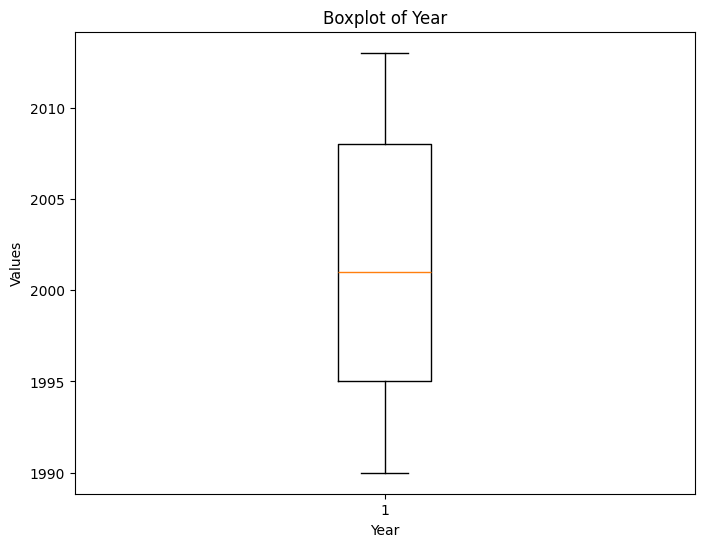

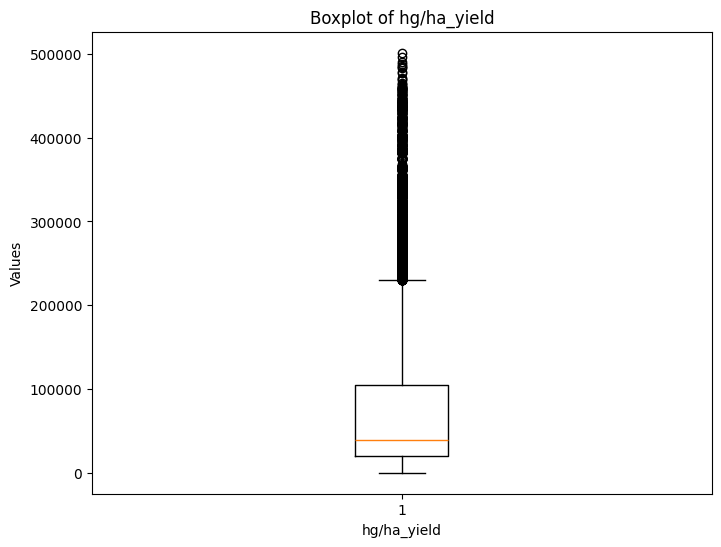

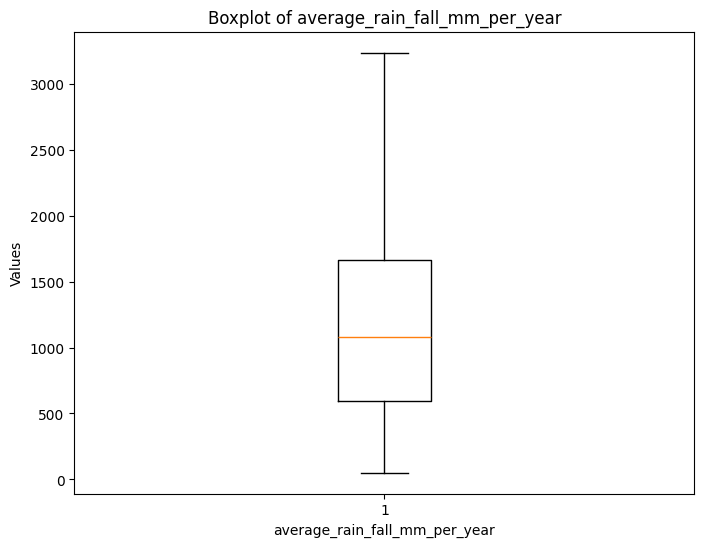

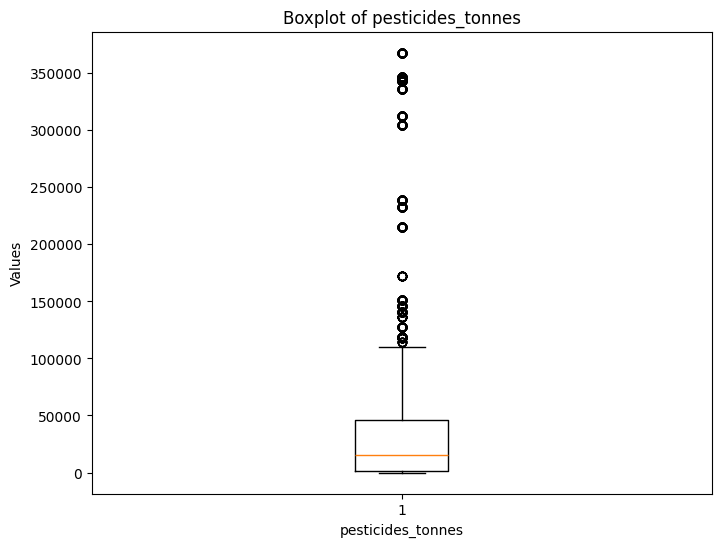

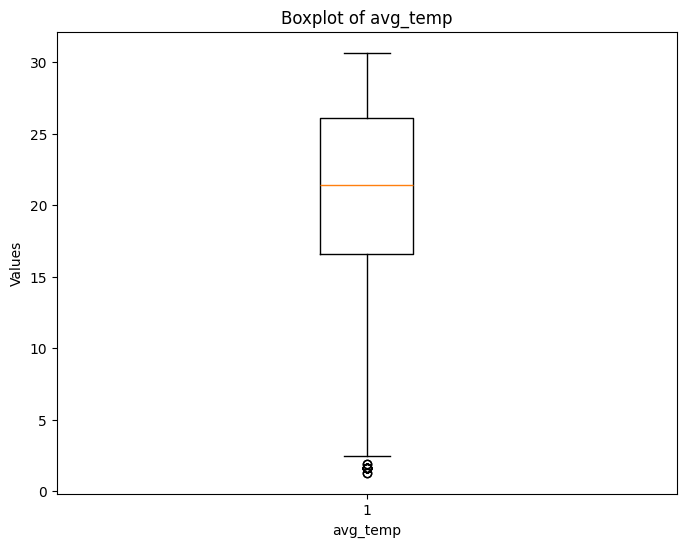

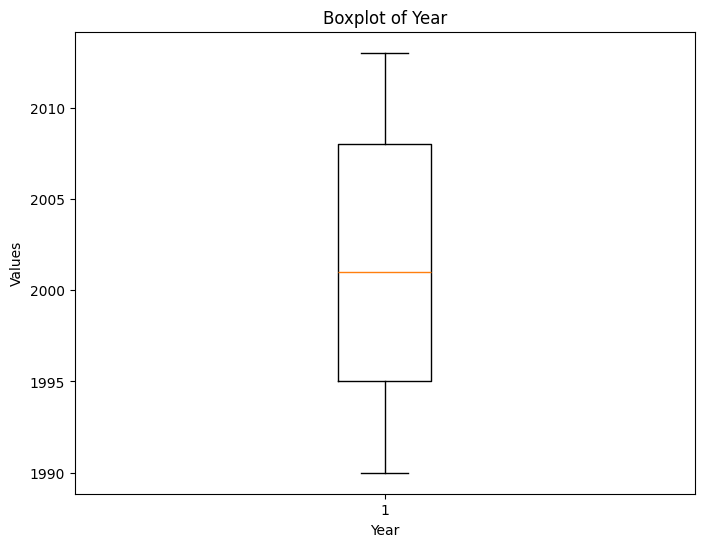

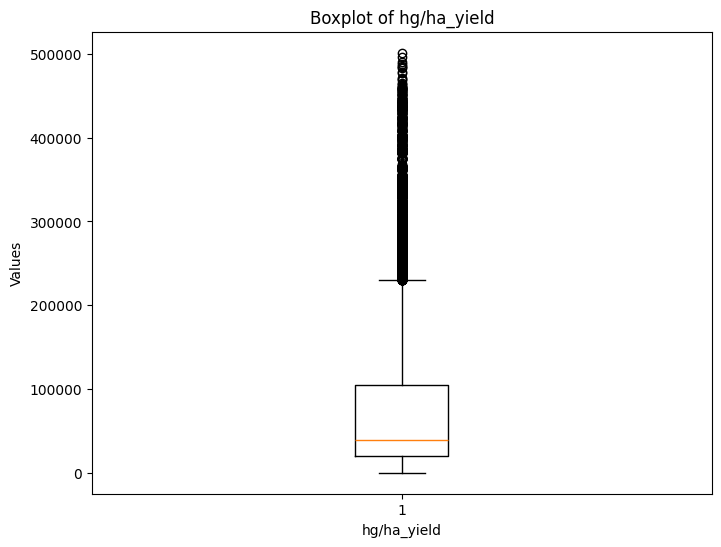

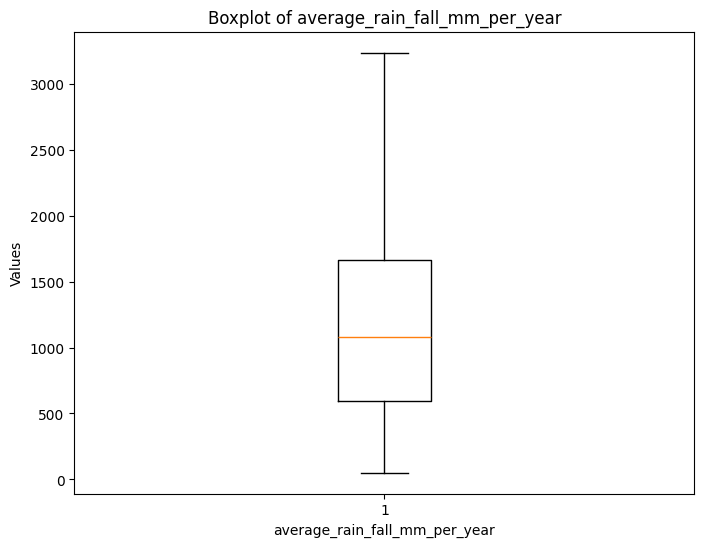

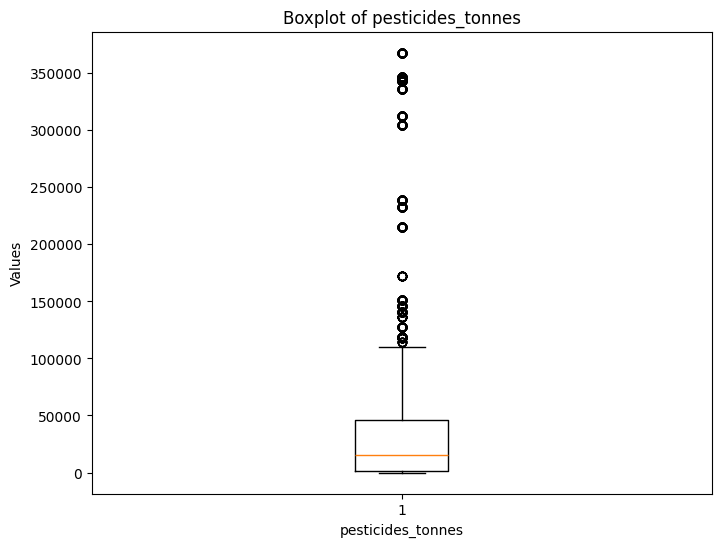

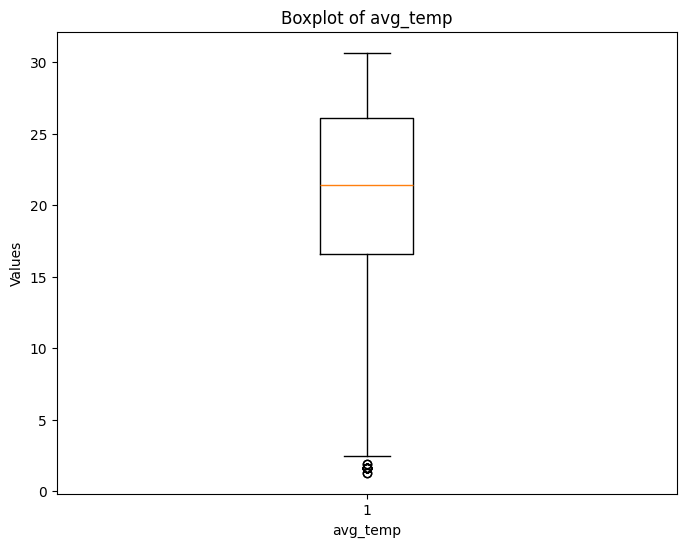

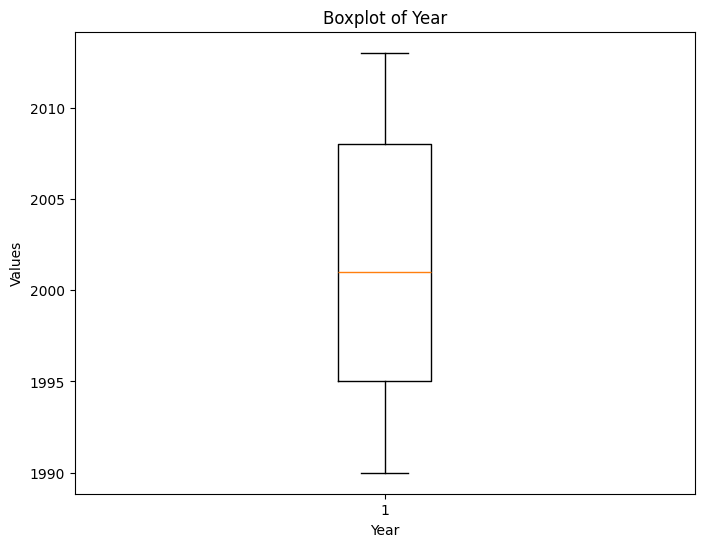

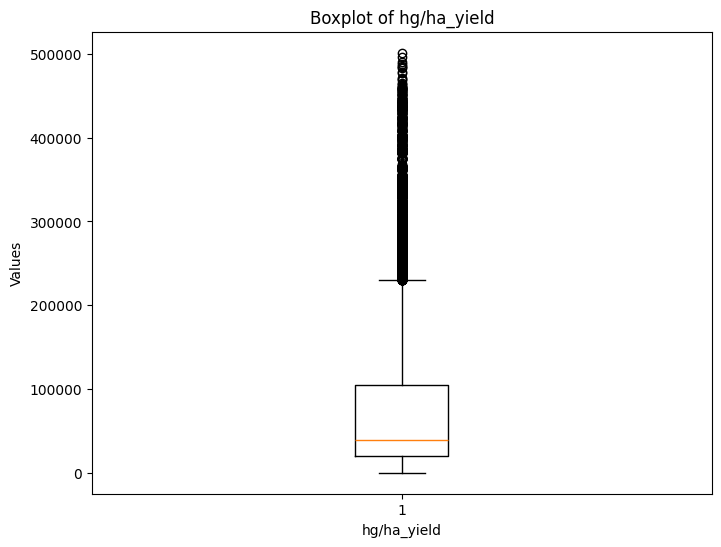

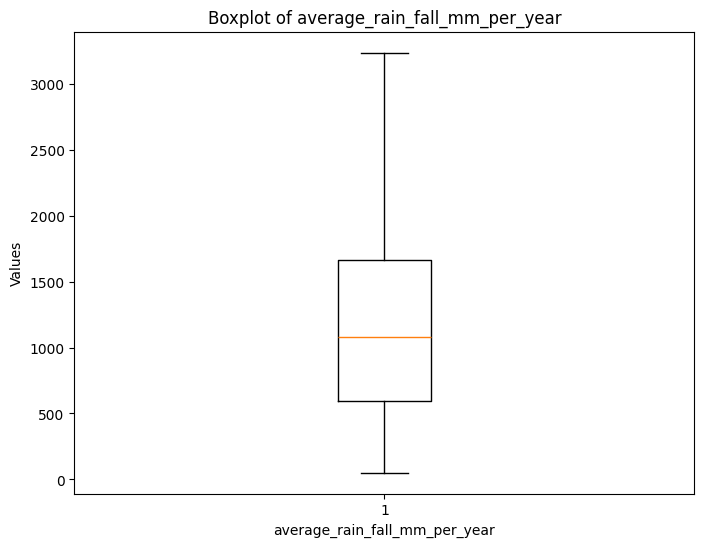

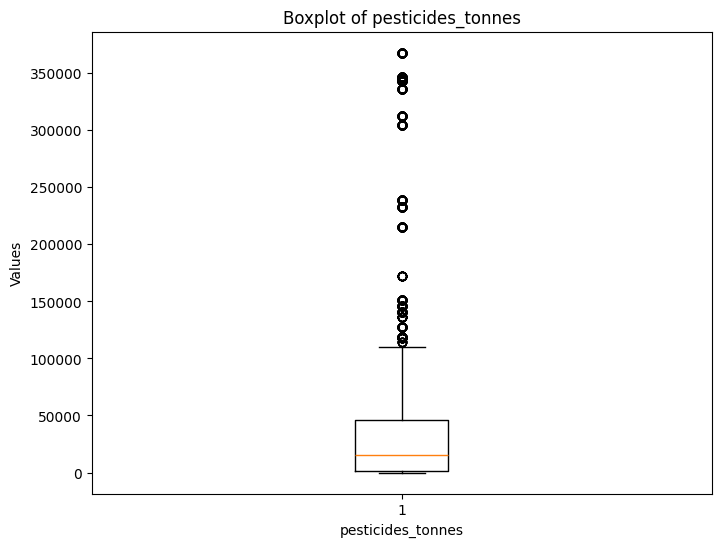

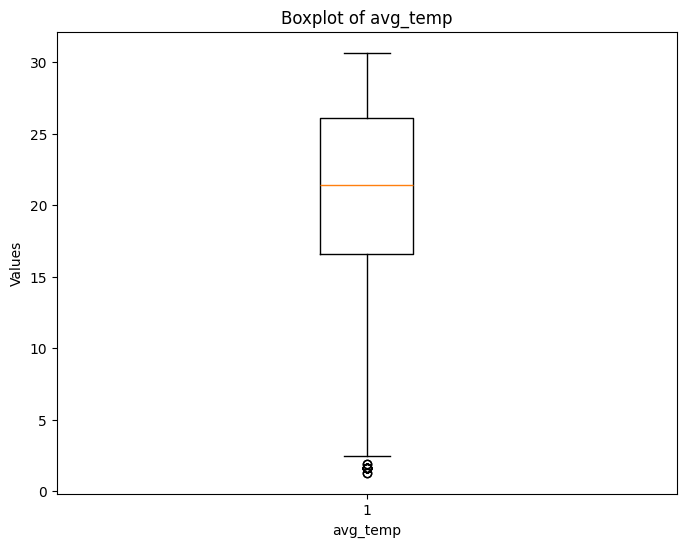

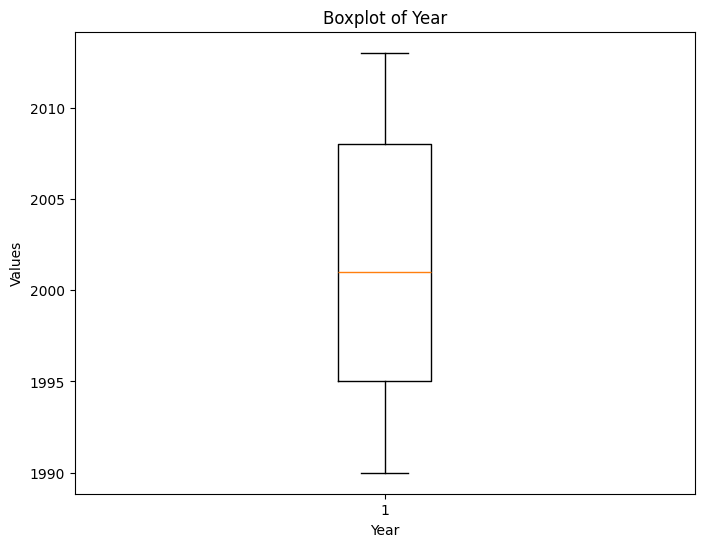

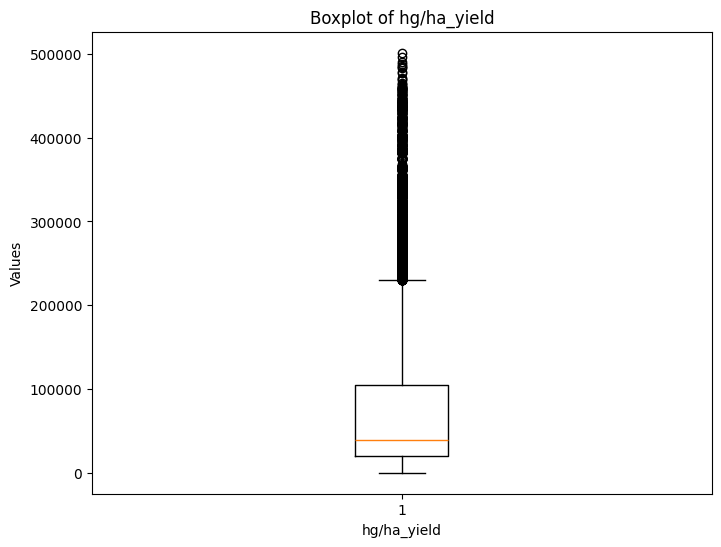

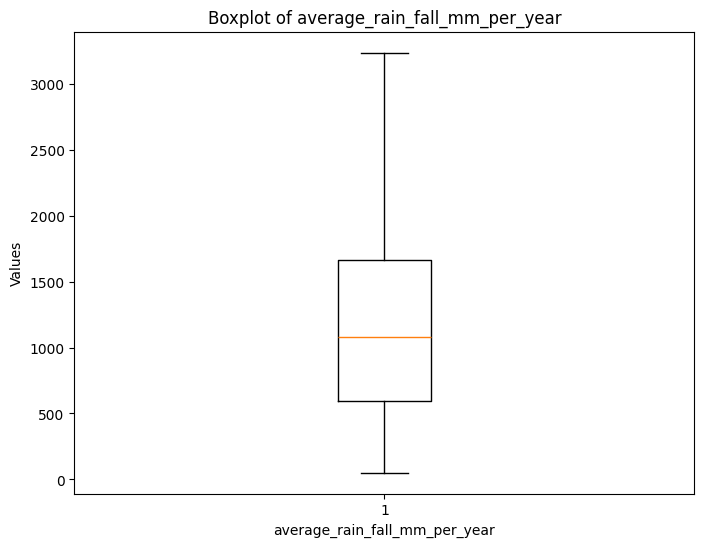

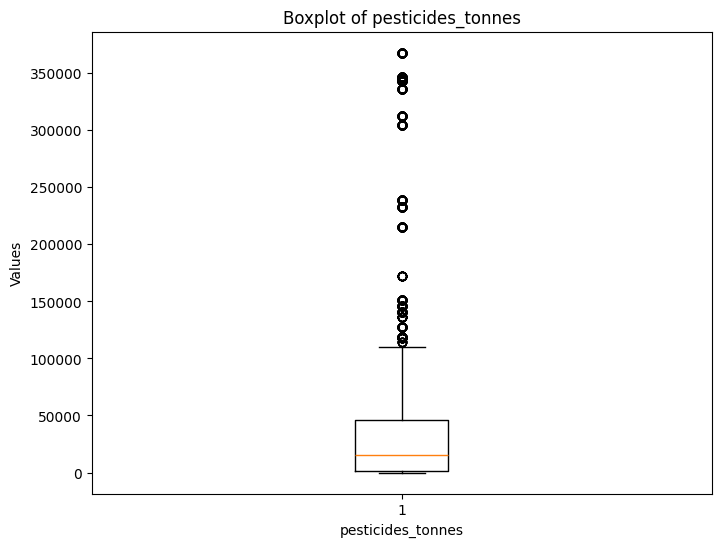

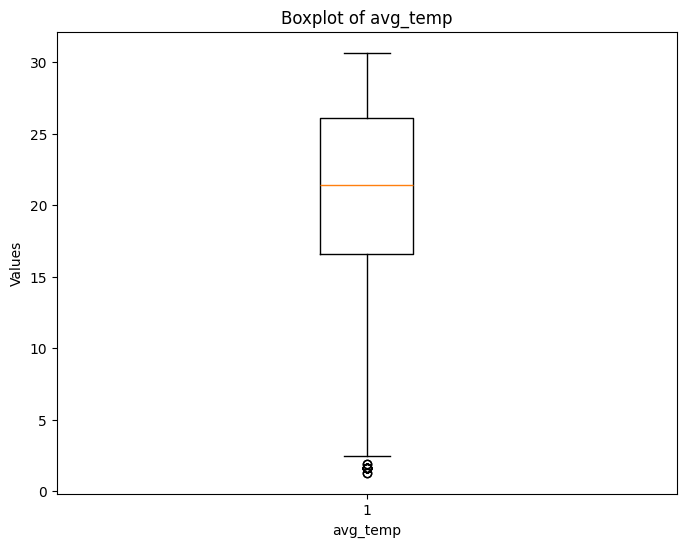

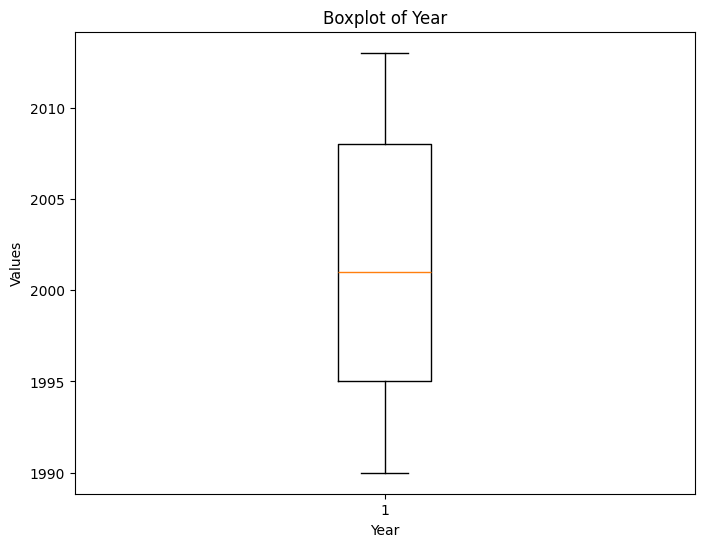

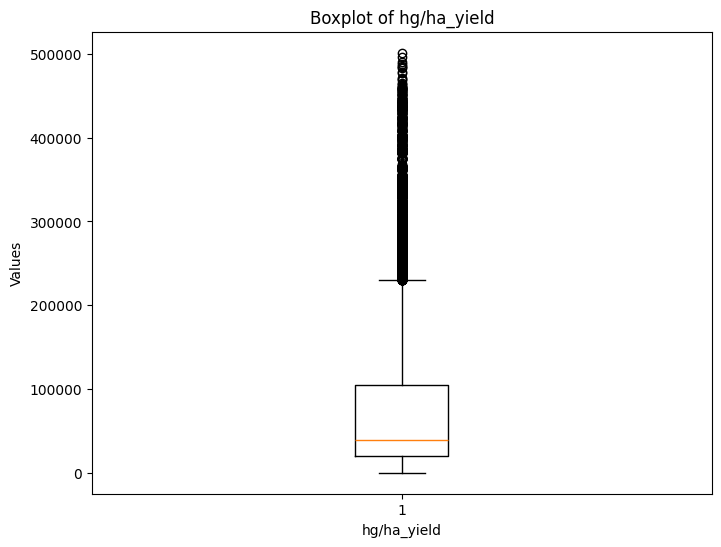

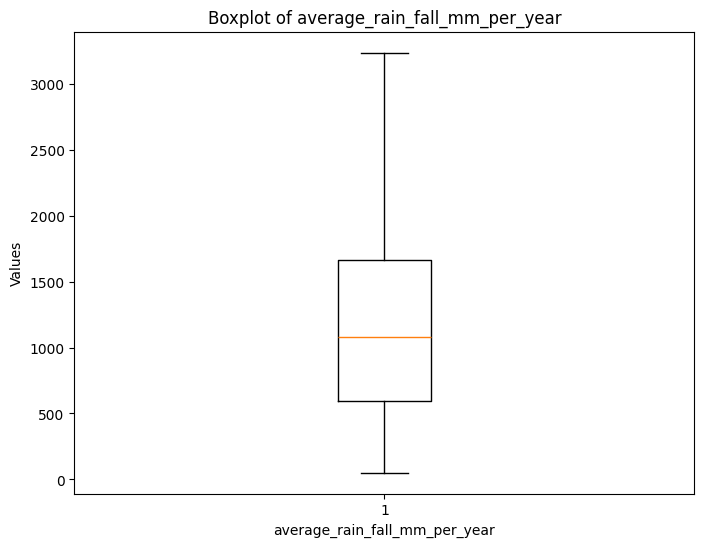

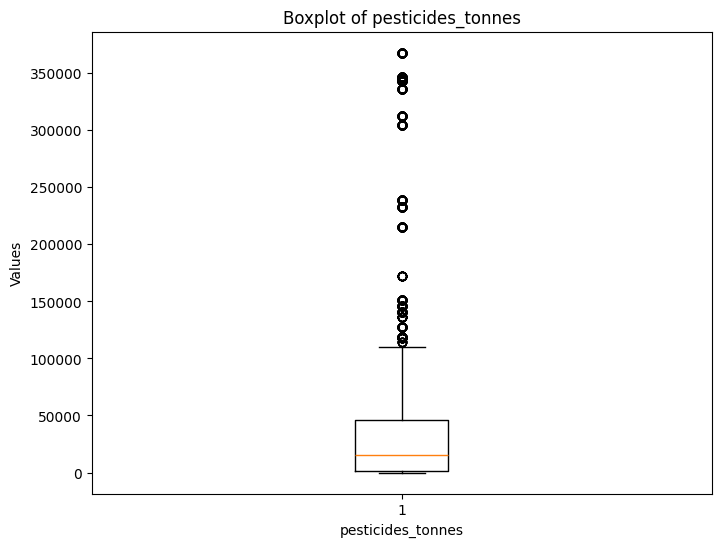

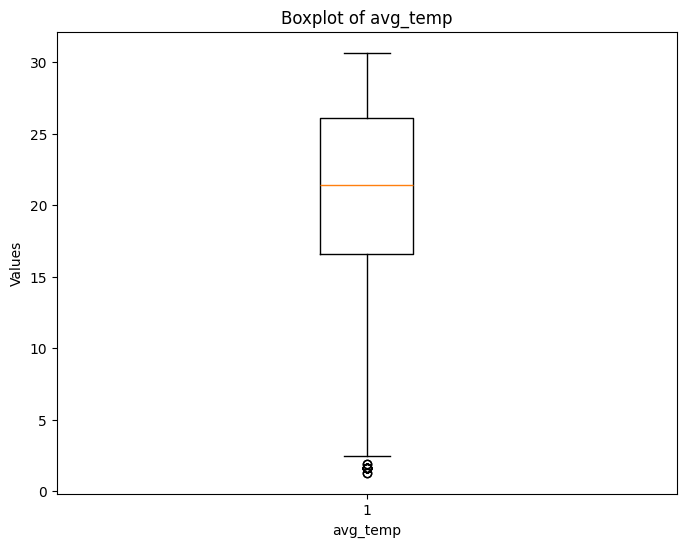

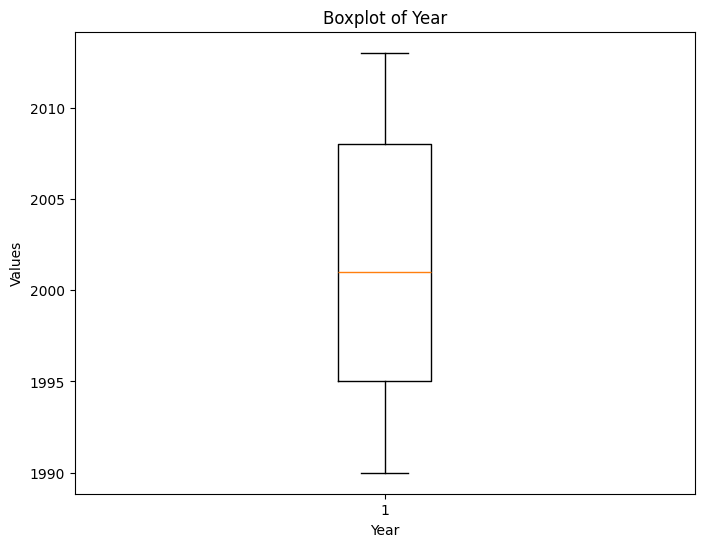

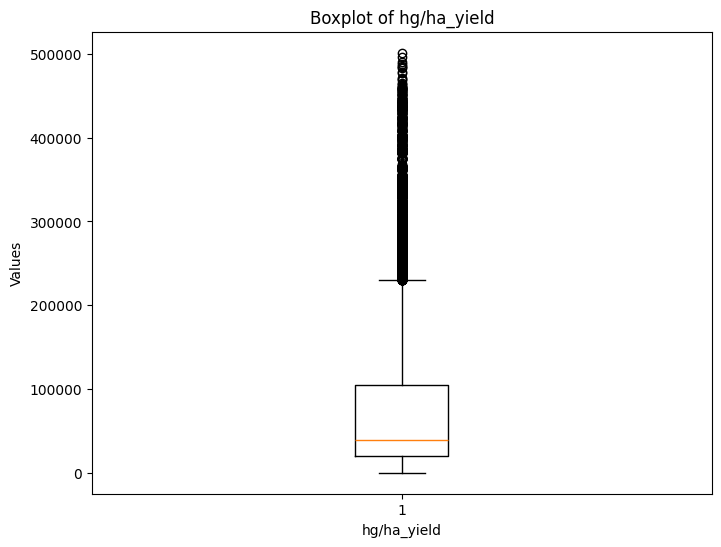

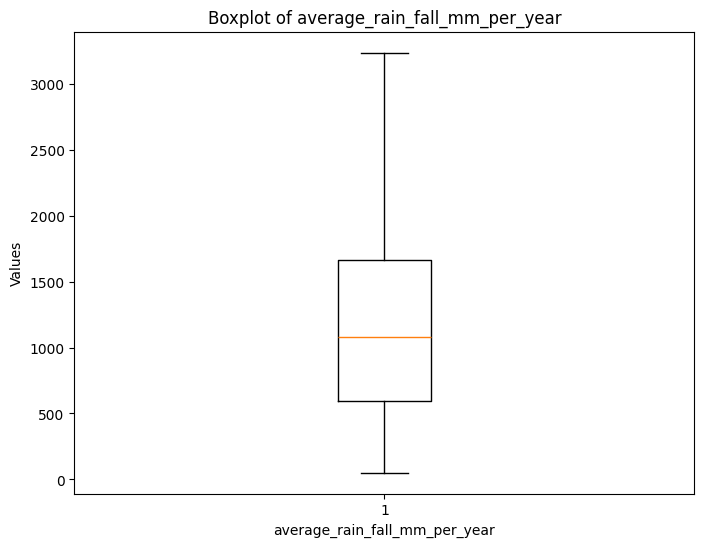

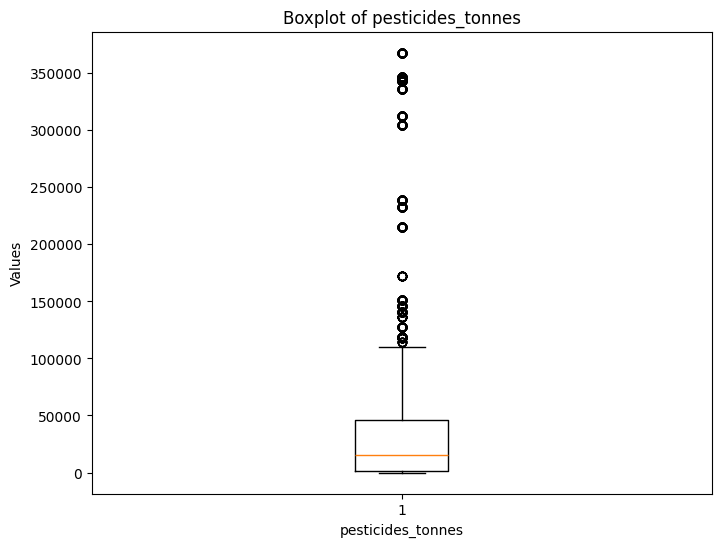

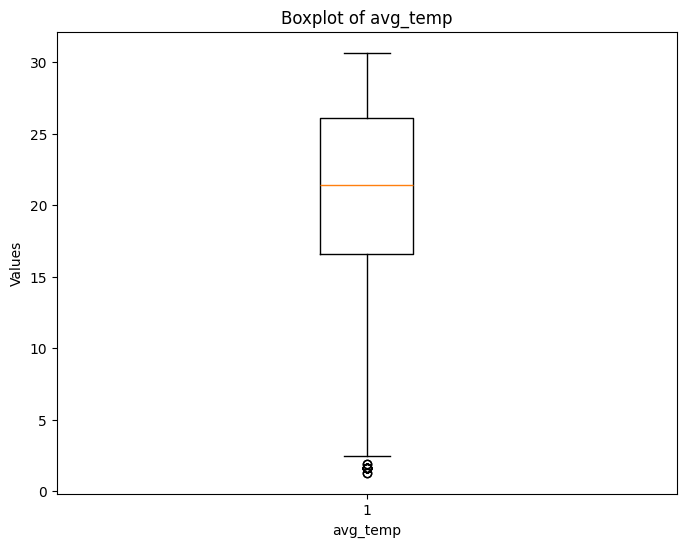

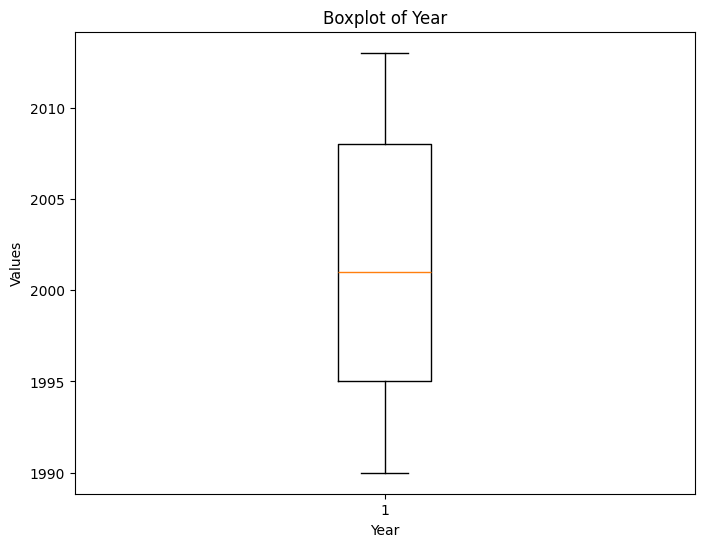

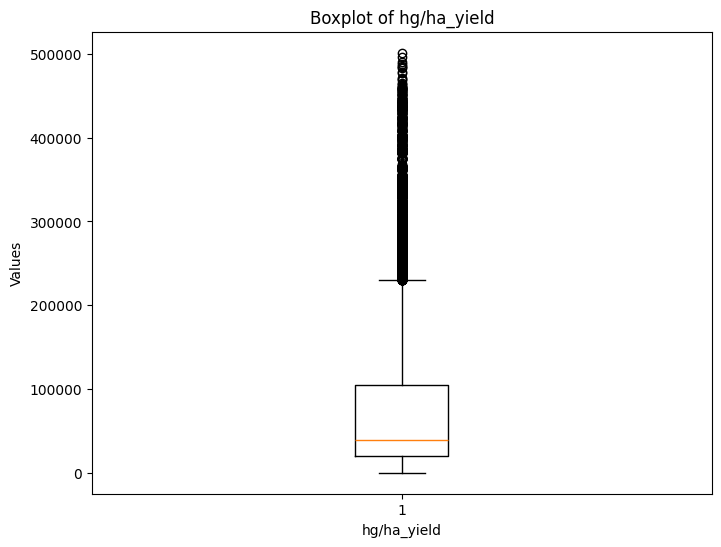

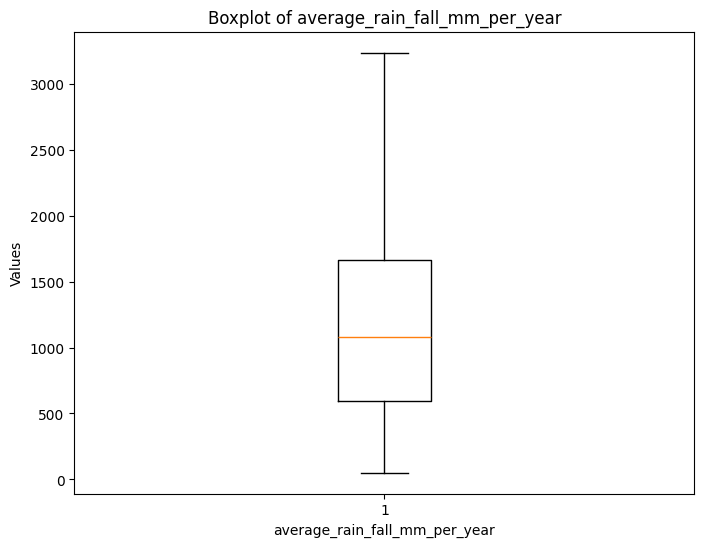

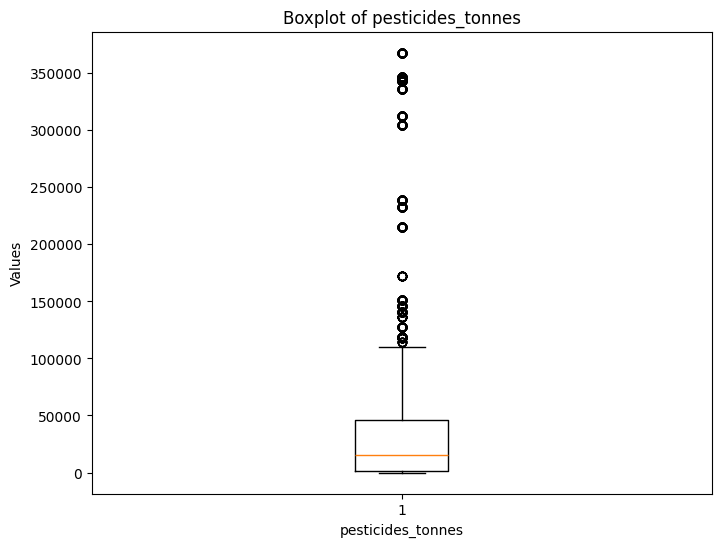

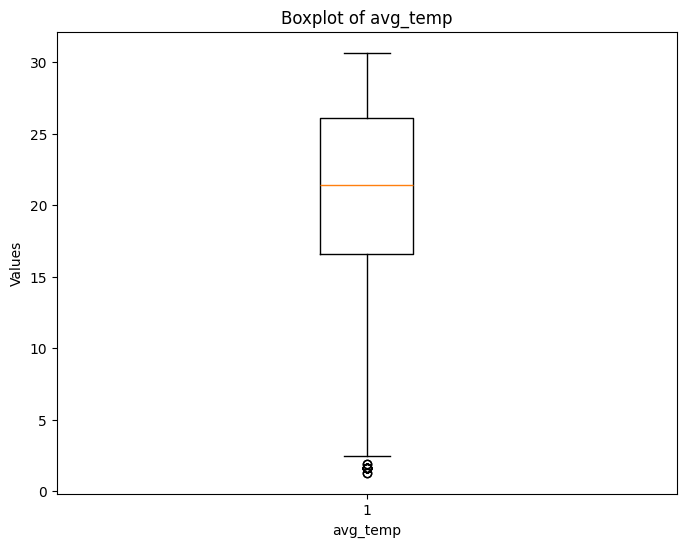

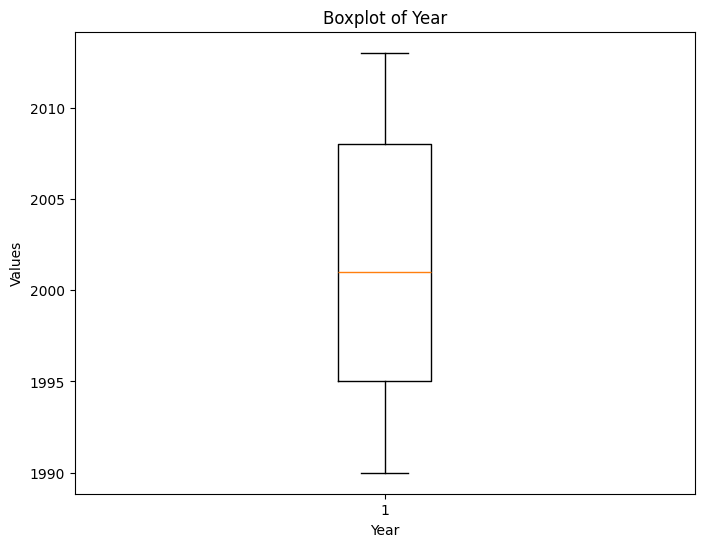

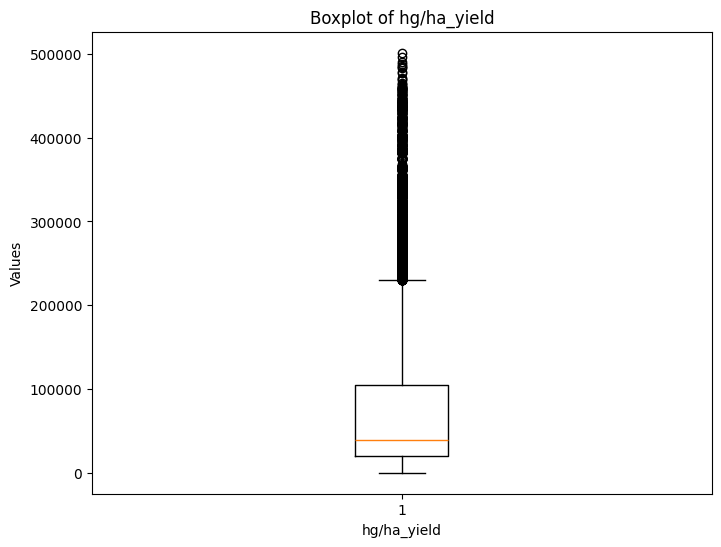

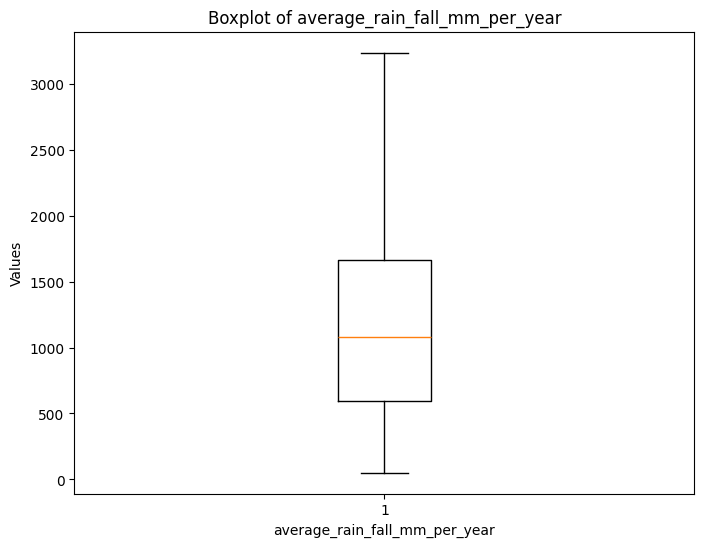

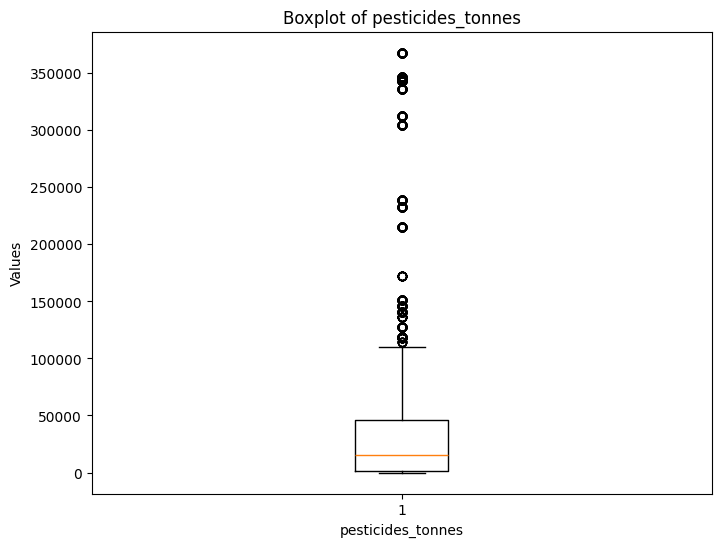

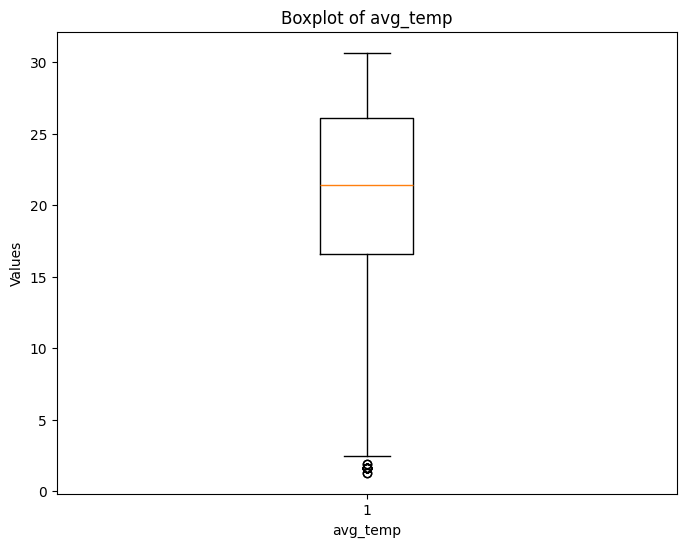

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical attribute
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.title(f'Boxplot of {column}')
    plt.boxplot(df[column].dropna())  # Drop NA values for plotting
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [122]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [123]:
df = df.drop(to_drop)

In [28]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [124]:
df['average_rain_fall_mm_per_year'].dtype

dtype('float64')

In [125]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [126]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [17]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

# Graph Frequency vs Area

In [18]:
len(df['Item'].unique())

10

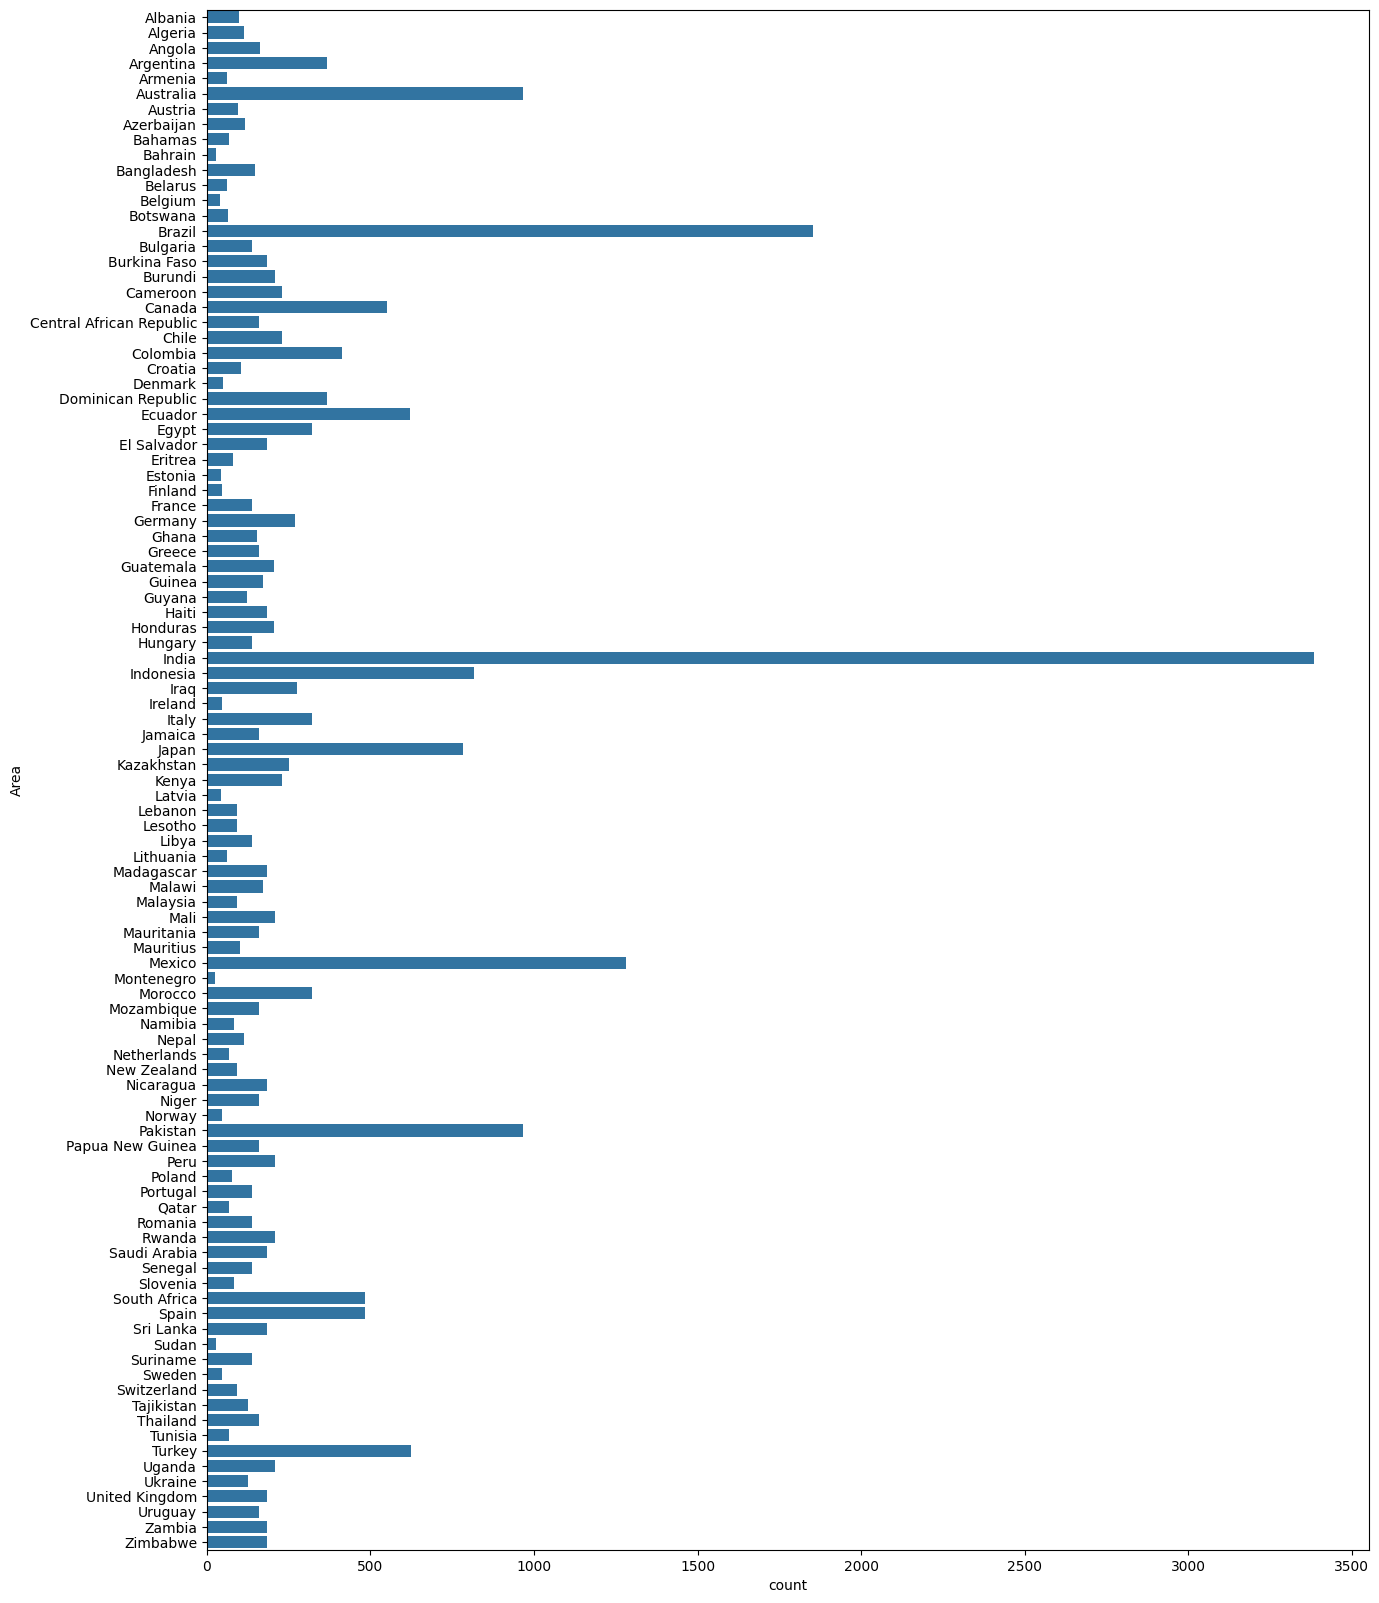

In [19]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [20]:
(df['Area'].value_counts() < 500).sum()

91

# yield_per_country

In [21]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())


In [22]:
df['hg/ha_yield'].sum()

1996196943

In [23]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

# Yield Per Country Graph

<Axes: >

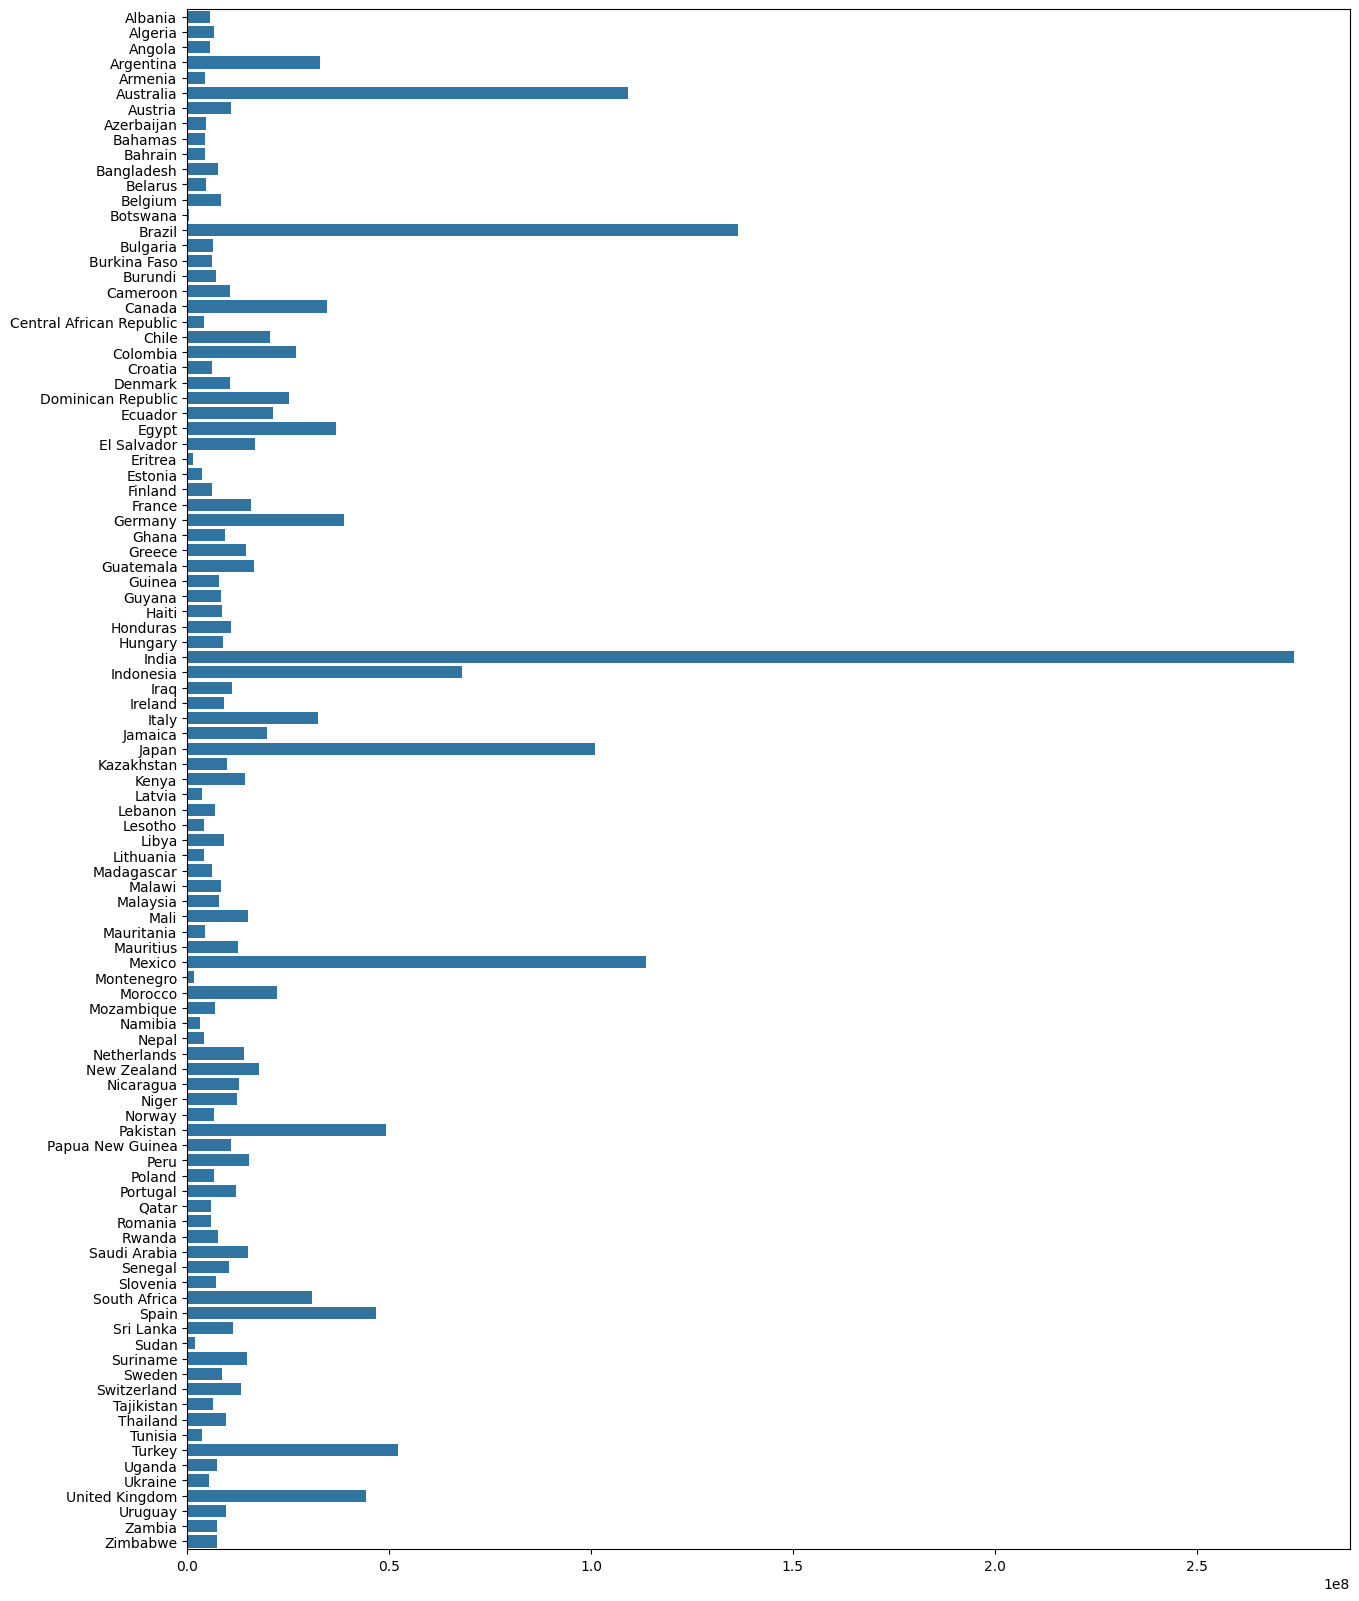

In [24]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

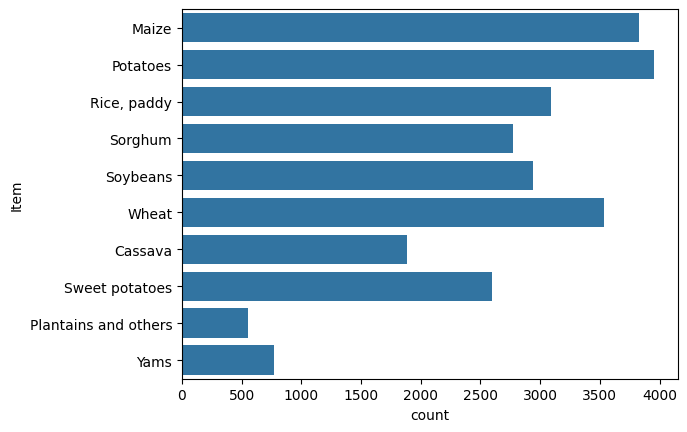

In [25]:
sns.countplot(y=df['Item'])

# Yield Vs Item

In [26]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

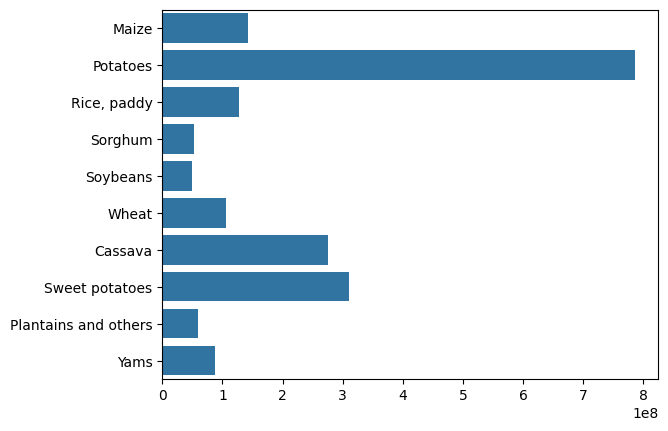

In [27]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split Rearranging Columns

In [24]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]

In [25]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [27]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

# Converting Categorical to Numerical and Scaling the values

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           25932 non-null  int64  
 1   average_rain_fall_mm_per_year  25932 non-null  float64
 2   pesticides_tonnes              25932 non-null  float64
 3   avg_temp                       25932 non-null  float64
 4   Area                           25932 non-null  object 
 5   Item                           25932 non-null  object 
 6   hg/ha_yield                    25932 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [30]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [31]:
print(X_train_dummy)

  (0, 0)	0.4954247915937623
  (0, 1)	-0.7521810808405797
  (0, 2)	-0.5695768841714229
  (0, 3)	-1.8400549389689067
  (0, 18)	1.0
  (0, 109)	1.0
  (1, 0)	-0.9210012422557905
  (1, 1)	-0.778717646669245
  (1, 2)	-0.47406579987392267
  (1, 3)	-1.5667953700185702
  (1, 44)	1.0
  (1, 111)	1.0
  (2, 0)	-1.204286449025701
  (2, 1)	-0.4086023864273333
  (2, 2)	-0.45194203405242334
  (2, 3)	-0.7920423875968766
  (2, 80)	1.0
  (2, 107)	1.0
  (3, 0)	1.4869230152884492
  (3, 1)	1.2632012607785845
  (3, 2)	-0.5926159119269865
  (3, 3)	1.0990380384344316
  (3, 50)	1.0
  (3, 110)	1.0
  (4, 0)	0.7787099983636728
  :	:
  (20740, 109)	1.0
  (20741, 0)	0.07049698143889649
  (20741, 1)	0.8176662871288871
  (20741, 2)	-0.5358207210055881
  (20741, 3)	-1.1103276809765303
  (20741, 72)	1.0
  (20741, 104)	1.0
  (20742, 0)	-0.49607343210092464
  (20742, 1)	-0.778717646669245
  (20742, 2)	-0.5164842012718367
  (20742, 3)	-1.5652427588313522
  (20742, 44)	1.0
  (20742, 108)	1.0
  (20743, 0)	-0.9210012422557905
 

In [36]:
print(X_test_dummy)

  (0, 0)	1.4869230152884492
  (0, 1)	0.728279960127067
  (0, 2)	0.3447121268053042
  (0, 3)	-1.1367220711592332
  (0, 51)	1.0
  (0, 111)	1.0
  (1, 0)	1.4869230152884492
  (1, 1)	-0.7759243239504381
  (1, 2)	1.763919999330237
  (1, 3)	-0.3495481992397972
  (1, 6)	1.0
  (1, 109)	1.0
  (2, 0)	-1.3459290524106562
  (2, 1)	0.3679413294009794
  (2, 2)	-0.5218670702787999
  (2, 3)	0.934461252589342
  (2, 28)	1.0
  (2, 108)	1.0
  (3, 0)	1.0619952051335835
  (3, 1)	0.890292677817866
  (3, 2)	-0.5503861722486368
  (3, 3)	0.8971985840961145
  (3, 31)	1.0
  (3, 110)	1.0
  (4, 0)	-0.49607343210092464
  :	:
  (5182, 107)	1.0
  (5183, 0)	0.353782188208807
  (5183, 1)	-0.778717646669245
  (5183, 2)	-0.4352969488221536
  (5183, 3)	-1.5621375364569168
  (5183, 44)	1.0
  (5183, 107)	1.0
  (5184, 0)	-1.0626438456407457
  (5184, 1)	0.21430857986660096
  (5184, 2)	-0.5688830340984542
  (5184, 3)	-0.506361929148797
  (5184, 101)	1.0
  (5184, 111)	1.0
  (5185, 0)	1.0619952051335835
  (5185, 1)	-0.911400475812

In [32]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

In [33]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [34]:
import pandas as pd

# Convert sparse matrix to DataFrame
X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train_dummy)

# Print the DataFrame
print(X_train_df)


            0         1         2         3    4    5    6    7    8    9    \
0      0.495425 -0.752181 -0.569577 -1.840055    0    0    0    0    0    0   
1     -0.921001 -0.778718 -0.474066 -1.566795    0    0    0    0    0    0   
2     -1.204286 -0.408602 -0.451942 -0.792042    0    0    0    0    0    0   
3      1.486923  1.263201 -0.592616  1.099038    0    0    0    0    0    0   
4       0.77871 -0.623688   0.10125 -1.482954    0    0    0    0    0    0   
...         ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
20740  1.486923 -0.088767  0.314464  0.723306    0    0    0    0    0    0   
20741  0.070497  0.817666 -0.535821 -1.110328    0    0    0    0    0    0   
20742 -0.496073 -0.778718 -0.516484 -1.565243    0    0    0    0    0    0   
20743 -0.921001 -0.088767  0.458651  0.852173    0    0    0    0    0    0   
20744 -1.062644  0.858169   0.86029  1.004329    0    0    0    0    0    0   

       ...  103  104  105  106  107  108  109  110 

In [35]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
import pandas as pd
ordinal=ordinalEncoder()
X_train['Area']=ordinal.fit_transform(X_train[['Area','Item']])
X_train['Item']=ordinal.fit_transform(X_train[['Item']])

NameError: name 'ordinalEncoder' is not defined

<Axes: >

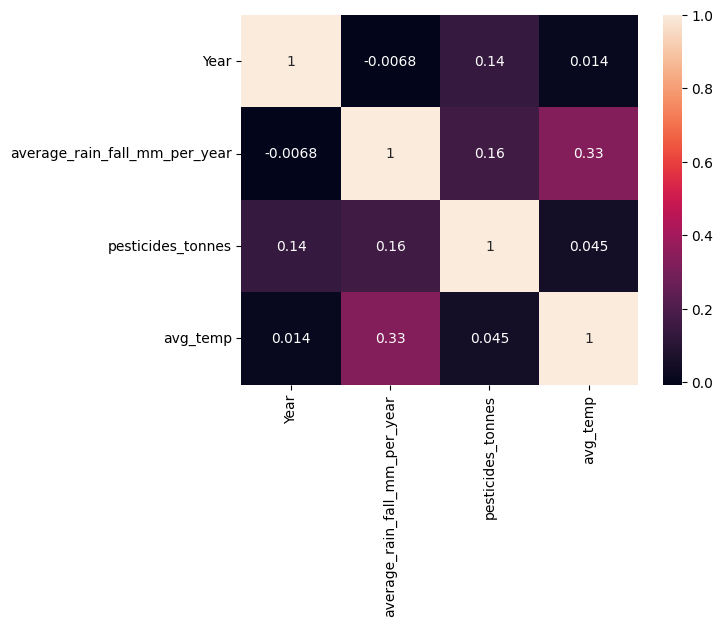

In [36]:
df=X_train[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp']]
df.sample()
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20745 entries, 4907 to 2955
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           20745 non-null  int64  
 1   average_rain_fall_mm_per_year  20745 non-null  float64
 2   pesticides_tonnes              20745 non-null  float64
 3   avg_temp                       20745 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 810.4 KB


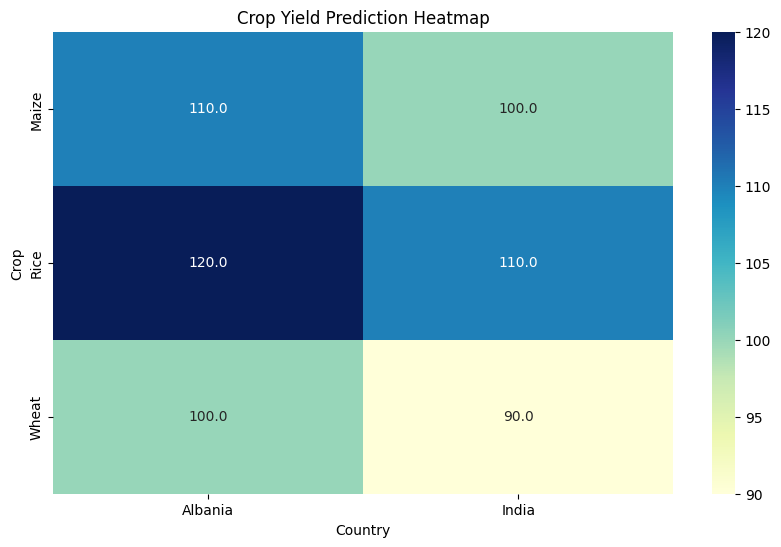

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your dataset)
data = {
    'crop': ['Wheat', 'Maize', 'Rice', 'Wheat', 'Maize', 'Rice'],
    'country': ['Albania', 'Albania', 'Albania', 'India', 'India', 'India'],
    'year': [2019, 2019, 2019, 2019, 2019, 2019],
    'rainfall': [800, 750, 850, 1200, 1100, 1150],
    'temperature': [25, 28, 26, 30, 32, 31],
    'pesticides': [50, 45, 55, 60, 55, 65],
    'yield': [100, 110, 120, 90, 100, 110]  # Crop yield (target variable)
}

# Create DataFrame
df = pd.DataFrame(data)

# Pivot table for heatmap
heatmap_data = df.pivot_table(index='crop', columns='country', values='yield')

# Draw heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', cbar=True)
plt.title('Crop Yield Prediction Heatmap')
plt.xlabel('Country')
plt.ylabel('Crop')
plt.show()


# Let's train our model

Linear Regression:  R^2 Score: 0.7473129246907246, MAPE: 91.17491433578805


C:\Users\Dipika Dahifale\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso:  R^2 Score: 0.7473261756207235, MAPE: 90.9442181312444
Ridge:  R^2 Score: 0.7473041781634001, MAPE: 90.78237188648566
Decision Tree:  R^2 Score: 0.9794455474951419, MAPE: 8.487923358581224
Random Forest:  R^2 Score: 0.9875604468853488, MAPE: 9.407084295875121


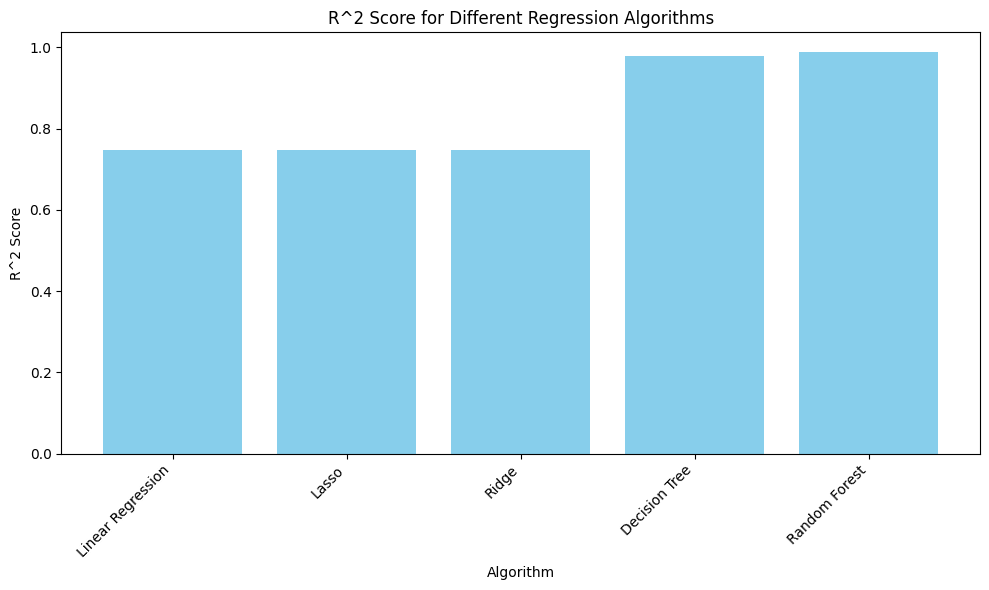

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def calculate_mape(actual_values, forecasted_values):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
    actual_values (array-like): Array of actual values.
    forecasted_values (array-like): Array of forecasted values.

    Returns:
    float: MAPE value.
    """
    absolute_errors = np.abs((actual_values - forecasted_values) / actual_values)
    mape = np.mean(absolute_errors) * 100
    return mape

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

r2_scores = []

for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred = md.predict(X_test_dummy)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    mape = calculate_mape(y_test, y_pred)
    
    print(f"{name}:  R^2 Score: {r2}, MAPE: {mape}")

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), r2_scores, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('R^2 Score')
plt.title('R^2 Score for Different Regression Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [40]:
from sklearn.tree import DecisionTreeRegressor
# Assuming X_train_dummy and y_train are your training data
# Assuming X_test_dummy and y_test are your testing data

# Fit the DecisionTreeRegressor model
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train_dummy, y_train)

# Access the decision tree
decision_tree = decision_tree_regressor.tree_

# Print information about the decision tree
print("Decision Tree:")
print("Number of nodes:", decision_tree.node_count)
print("Depth of tree:", decision_tree.max_depth)

Decision Tree:
Number of nodes: 23783
Depth of tree: 53


# Select model

In [47]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 77391.])

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train_dummy,y_train)
rf.predict(X_test_dummy)

KeyboardInterrupt: 

# Predictive System

In [48]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield =dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)


C:\Users\Dipika Dahifale\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dipika Dahifale\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [49]:
result

array([36613.])

In [50]:
1990	1485.0	121.00	16.37	Albania	Maize	36613
2013	657.0	2550.07	19.76	Zimbabwe	Sorghum	3066

SyntaxError: invalid syntax (4022762754.py, line 1)

# Pickle Files

In [51]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [52]:
import sklearn
print(sklearn.__version__)

1.4.1.post1
